<a href="https://colab.research.google.com/github/damlakeskin/gaih_ml_25/blob/main/AIRBNB_ML25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install missingno folium xgboost

In [2]:
#Gerekli kütüphanelerin eklenmesi
from sklearn.preprocessing import LabelEncoder
import kagglehub
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:

# İleride karşılaşacağım further warnigslerin susturulması için kod.

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=DataConversionWarning)

In [4]:
#Datasetin içeriye aktarılması.
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arianazmoudeh_airbnbopendata_path = kagglehub.dataset_download('arianazmoudeh/airbnbopendata')

print('Data source import complete.')


Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


In [6]:
#Dataseti içeriye aktarıldıktan sonra veriye genel bir bakış.
NaN_df=pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv")
#Verisetine NaN_df ismini veriyorum, NaN değerler silindikten sonra kalan verisetine df tanımlaması yapılacaktır.
NaN_df.head()

<ipython-input-6-6b9e3812d64e>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  NaN_df=pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv")


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   
2  40.80902 -73.94190  United States           US             True   
3  40.68514 -73.95976  United States           US             True   
4  40.79851 -73.94399  United States           US            False   

  cancellation_policy        room type  Construction year  price service fee  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    
2            flexible     Private room             2005.0  $620        $124    
3            moderate  Entire home/apt             2005.0  $368         $74    
4            moderate  Entire home/apt             2009.0  $204         $41    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   
1            30.0               45.0   5/21/2022               0.38   
2             3.0                0.0         NaN                NaN   
3            30.0              270.0    7/5/2019               4.64   
4            10.0                9.0  11/19/2018               0.10   

   review rate number  calculated host listings count  availability 365  \
0                 4.0                             6.0             286.0   
1                 4.0                             2.0             228.0   
2                 5.0                             1.0             352.0   
3                 4.0                             1.0             322.0   
4                 3.0                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN

In [7]:
#Verisetinde bulunan boş değerlerin incelenmesi.
NaN_df.shape

(102599, 26)

Verisetim 102599 satır ve 26 sütundan oluşmaktadır. Aşağıda daha detaylı olarak bilgiler bulunmaktadır.

In [8]:
#Verisetine sütun bazlı bir bakış.
NaN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
#Verisetinde bulunan NaN değerlerin incelenmesi.
NaN_df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license                           102597
dtype: int64

In [10]:
#Verisetinde bulunan boş(NaN) olmayan değerlere bakış.
NaN_df.notnull().sum()

id                                102599
NAME                              102349
host id                           102599
host_identity_verified            102310
host name                         102193
neighbourhood group               102570
neighbourhood                     102583
lat                               102591
long                              102591
country                           102067
country code                      102468
instant_bookable                  102494
cancellation_policy               102523
room type                         102599
Construction year                 102385
price                             102352
service fee                       102326
minimum nights                    102190
number of reviews                 102416
last review                        86706
reviews per month                  86720
review rate number                102273
calculated host listings count    102280
availability 365                  102151
house_rules                        50468
license                                2
dtype: int64

In [11]:
print(f"Veri seti içerisinde toplam {NaN_df.notnull().sum().sum()} adet eksik olmayan, {NaN_df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 2476805 adet eksik olmayan, 190769 eksik gözlem var.


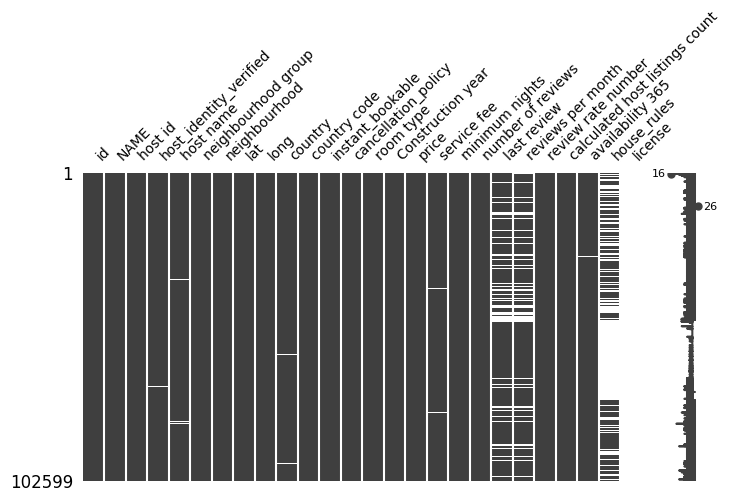

In [12]:
#Missigno ile bu boş değerlerin veri içerisinde dağılımını görselleştirdim. Veriseti bu haliyle, bütün sütunlarında veri olan sadece bir satıra sahip. Bu nedenle ilk önce istemediğim sütunları atarak verisetini düzenleme yoluna gittim.

msno.matrix(NaN_df, figsize=(8, 4), fontsize=10)

plt.show()

Grafikte görüldüğü üzere license, house_rules, last review, reviews per month sütunlarında %10 üzerinde eksik veriler bulunmakta. Bu sayede bu sütunları ilerleyen adımlardan önce çıkarmam gerektiğini görmekteyim. Verisetini de kısaca incelediğimde bunun fiyat ve farklı sütunlara etki etmeyeceğini düşünmekteyim.

In [13]:
NaN_df.nunique()

#Verisetindeki benzersiz değerlere bakış. 1 olan değerler, "counrty code" ve "license" varyant içermediği için sonrasında silinecektir. Country sütunu ise genel olarak bilgi verebilmesi adına bırakılmıştır.


id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules                         1976
license                                1
dtype: int64

In [14]:
for column in ['cancellation_policy', 'host_identity_verified', 'country code', 'instant_bookable', 'license']:
  print(f"{column} sütununda {NaN_df[column].unique()} değerleri vardır.")
  print(f"{NaN_df[column].value_counts()}\n")

  #Burada 3 ve daha az değer bulunduran sütunlar ayrı olarak incelenmiştir. Sonrasında veri temizliği yaparken faydalanmak için.

cancellation_policy sütununda ['strict' 'moderate' 'flexible' nan] değerleri vardır.
cancellation_policy
moderate    34343
strict      34106
flexible    34074
Name: count, dtype: int64

host_identity_verified sütununda ['unconfirmed' 'verified' nan] değerleri vardır.
host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64

country code sütununda ['US' nan] değerleri vardır.
country code
US    102468
Name: count, dtype: int64

instant_bookable sütununda [False True nan] değerleri vardır.
instant_bookable
False    51474
True     51020
Name: count, dtype: int64

license sütununda [nan '41662/AL'] değerleri vardır.
license
41662/AL    2
Name: count, dtype: int64



Sütunları tekrardan adlandırmak


In [15]:
#Sütun isimlerinin hepsini büyük harflerden oluşacak şekilde düzenliyorum.
NaN_df.columns = NaN_df.columns.str.upper()

In [16]:
NaN_df.columns

Index(['ID', 'NAME', 'HOST ID', 'HOST_IDENTITY_VERIFIED', 'HOST NAME',
       'NEIGHBOURHOOD GROUP', 'NEIGHBOURHOOD', 'LAT', 'LONG', 'COUNTRY',
       'COUNTRY CODE', 'INSTANT_BOOKABLE', 'CANCELLATION_POLICY', 'ROOM TYPE',
       'CONSTRUCTION YEAR', 'PRICE', 'SERVICE FEE', 'MINIMUM NIGHTS',
       'NUMBER OF REVIEWS', 'LAST REVIEW', 'REVIEWS PER MONTH',
       'REVIEW RATE NUMBER', 'CALCULATED HOST LISTINGS COUNT',
       'AVAILABILITY 365', 'HOUSE_RULES', 'LICENSE'],
      dtype='object')

Gerekli görülmeyen sütunların silinmesi

In [17]:
columns_to_keep = ['ID' , 'HOST ID', 'HOST_IDENTITY_VERIFIED', 'HOST NAME',
       'NEIGHBOURHOOD GROUP', 'NEIGHBOURHOOD', 'LAT', 'LONG', 'COUNTRY', 'INSTANT_BOOKABLE', 'CANCELLATION_POLICY', 'ROOM TYPE',
       'CONSTRUCTION YEAR', 'PRICE', 'SERVICE FEE', 'MINIMUM NIGHTS',
       'NUMBER OF REVIEWS','REVIEW RATE NUMBER', 'CALCULATED HOST LISTINGS COUNT','AVAILABILITY 365']

columns_to_drop = ['LICENSE','HOUSE_RULES','LAST REVIEW','REVIEWS PER MONTH','COUNTRY CODE','NAME']

#drop sütunlarının gerekli olmadığı görüldüğü için datasetinden düşürülmüştür.

In [18]:
NaN_df.drop(columns=columns_to_drop,inplace=True)

In [19]:
NaN_df.columns == columns_to_keep

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [20]:
NaN_df.head() # Kontrol amaçlı veriseti görüntülenmiştir.

ID      HOST ID HOST_IDENTITY_VERIFIED HOST NAME NEIGHBOURHOOD GROUP  \
0  1001254  80014485718            unconfirmed  Madaline            Brooklyn   
1  1002102  52335172823               verified     Jenna           Manhattan   
2  1002403  78829239556                    NaN     Elise           Manhattan   
3  1002755  85098326012            unconfirmed     Garry            Brooklyn   
4  1003689  92037596077               verified    Lyndon           Manhattan   

  NEIGHBOURHOOD       LAT      LONG        COUNTRY INSTANT_BOOKABLE  \
0    Kensington  40.64749 -73.97237  United States            False   
1       Midtown  40.75362 -73.98377  United States            False   
2        Harlem  40.80902 -73.94190  United States             True   
3  Clinton Hill  40.68514 -73.95976  United States             True   
4   East Harlem  40.79851 -73.94399  United States            False   

  CANCELLATION_POLICY        ROOM TYPE  CONSTRUCTION YEAR  PRICE SERVICE FEE  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    
2            flexible     Private room             2005.0  $620        $124    
3            moderate  Entire home/apt             2005.0  $368         $74    
4            moderate  Entire home/apt             2009.0  $204         $41    

   MINIMUM NIGHTS  NUMBER OF REVIEWS  REVIEW RATE NUMBER  \
0            10.0                9.0                 4.0   
1            30.0               45.0                 4.0   
2             3.0                0.0                 5.0   
3            30.0              270.0                 4.0   
4            10.0                9.0                 3.0   

   CALCULATED HOST LISTINGS COUNT  AVAILABILITY 365  
0                             6.0             286.0  
1                             2.0             228.0  
2                             1.0             352.0  
3                             1.0             322.0  
4                             1.0             289.0

Aynı sütunların atılması

In [21]:
NaN_df.duplicated().sum()
#Aynı sütunların temizlenmesi.

np.int64(541)

In [22]:
NaN_df.drop_duplicates(inplace=True)

In [23]:
NaN_df.duplicated().sum()

np.int64(0)

NaN Değerlerin temizlenmesi

In [24]:
#Son bir kez NaN değerlerime bakıyorum.
NaN_df.isna().sum()

ID                                  0
HOST ID                             0
HOST_IDENTITY_VERIFIED            289
HOST NAME                         404
NEIGHBOURHOOD GROUP                29
NEIGHBOURHOOD                      16
LAT                                 8
LONG                                8
COUNTRY                           532
INSTANT_BOOKABLE                  105
CANCELLATION_POLICY                76
ROOM TYPE                           0
CONSTRUCTION YEAR                 214
PRICE                             247
SERVICE FEE                       273
MINIMUM NIGHTS                    400
NUMBER OF REVIEWS                 183
REVIEW RATE NUMBER                319
CALCULATED HOST LISTINGS COUNT    319
AVAILABILITY 365                  448
dtype: int64

In [25]:
df=NaN_df.dropna()
#ve NaN değerlerimi atarak artık datastime df ismini veriyorum.

In [26]:
df.isna().sum()

ID                                0
HOST ID                           0
HOST_IDENTITY_VERIFIED            0
HOST NAME                         0
NEIGHBOURHOOD GROUP               0
NEIGHBOURHOOD                     0
LAT                               0
LONG                              0
COUNTRY                           0
INSTANT_BOOKABLE                  0
CANCELLATION_POLICY               0
ROOM TYPE                         0
CONSTRUCTION YEAR                 0
PRICE                             0
SERVICE FEE                       0
MINIMUM NIGHTS                    0
NUMBER OF REVIEWS                 0
REVIEW RATE NUMBER                0
CALCULATED HOST LISTINGS COUNT    0
AVAILABILITY 365                  0
dtype: int64

In [27]:
print("Orijinal veri şekli:", NaN_df.shape)
print("Temizlenmiş veri şekli:", df.shape)
#Temizlenmiş ve asıl verisetimi karşılaştırıyorum. İstemediğim sütunları NaN temizliği yapmadan önce attığım için sütun sayım aynı.

Orijinal veri şekli: (102058, 20)
Temizlenmiş veri şekli: (98733, 20)


Veriyi temizleme kısmında doldurmak yerine çıkartmayı seçtim ve %5'ten daha az azaldığı için böyle devam etmeye karar verdim.

In [28]:
df.info()

#Temizlediğim verisetime genel bir bakış atıyorum.

<class 'pandas.core.frame.DataFrame'>
Index: 98733 entries, 0 to 102040
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              98733 non-null  int64  
 1   HOST ID                         98733 non-null  int64  
 2   HOST_IDENTITY_VERIFIED          98733 non-null  object 
 3   HOST NAME                       98733 non-null  object 
 4   NEIGHBOURHOOD GROUP             98733 non-null  object 
 5   NEIGHBOURHOOD                   98733 non-null  object 
 6   LAT                             98733 non-null  float64
 7   LONG                            98733 non-null  float64
 8   COUNTRY                         98733 non-null  object 
 9   INSTANT_BOOKABLE                98733 non-null  object 
 10  CANCELLATION_POLICY             98733 non-null  object 
 11  ROOM TYPE                       98733 non-null  object 
 12  CONSTRUCTION YEAR               9873

Yeni Datasetteki farklı değerlere bakış

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [30]:
for column in ['ID', 'HOST ID', 'HOST_IDENTITY_VERIFIED', 'HOST NAME',
       'NEIGHBOURHOOD GROUP', 'NEIGHBOURHOOD', 'LAT', 'LONG', 'COUNTRY', 'INSTANT_BOOKABLE', 'CANCELLATION_POLICY', 'ROOM TYPE',
       'CONSTRUCTION YEAR', 'PRICE', 'SERVICE FEE', 'MINIMUM NIGHTS',
       'NUMBER OF REVIEWS','REVIEW RATE NUMBER', 'CALCULATED HOST LISTINGS COUNT','AVAILABILITY 365']:

  print(f"\n--- {column} ---")

  # Unique değerler
  unique_vals = df[column].dropna().unique()
  if pd.api.types.is_numeric_dtype(df[column]):
    unique_vals = sorted([round(val, 2) for val in unique_vals])

  print(f"{column} sütununda toplam {len(unique_vals)} farklı değer var. İlk 10 tanesi:\n{unique_vals[:10]}")

  # En çok geçen 10 değer
  print("En sık geçen 10 değer:")
  print(df[column].value_counts().head(10))

  #Verisetimde en sık geçen 10 değeri inceliyorum, bu verisetini daha iyi anlamamı sağlıyor. Bununlar birlikte yazım yanlışlarını ve normal olmayan değerlerin de gözlemlenmesini sağlıyor.


--- ID ---
ID sütununda toplam 98733 farklı değer var. İlk 10 tanesi:
[np.int64(1001254), np.int64(1002102), np.int64(1002755), np.int64(1003689), np.int64(1004098), np.int64(1005202), np.int64(1005754), np.int64(1006307), np.int64(1006859), np.int64(1007411)]
En sık geçen 10 değer:
ID
57358028    1
1001254     1
1002102     1
1002755     1
1003689     1
1004098     1
1005202     1
1005754     1
1006307     1
1006859     1
Name: count, dtype: int64

--- HOST ID ---
HOST ID sütununda toplam 98732 farklı değer var. İlk 10 tanesi:
[np.int64(123600518), np.int64(124039648), np.int64(124472619), np.int64(129756565), np.int64(130349612), np.int64(130593431), np.int64(131602089), np.int64(132238305), np.int64(133264740), np.int64(134452120)]
En sık geçen 10 değer:
HOST ID
29531702698    2
26979507605    1
68579484969    1
74223606146    1
82932768411    1
44096774001    1
38943295529    1
94605292208    1
10349202691    1
76241261814    1
Name: count, dtype: int64

--- HOST_IDENTITY_VERIFIED

Price ve Service Fee için temizleme

In [31]:
print(f"Before cleaning: \n{df[['PRICE', 'SERVICE FEE']].head()}")

# Clean and convert to float64 with error handling
df['PRICE'] = (
    df['PRICE']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters except periods
    .pipe(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid → NaN
    .astype('float64')
)

df['SERVICE FEE'] = (
    df['SERVICE FEE']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
    .astype('float64')
)

print(f"After cleaning: \n{df[['PRICE', 'SERVICE FEE']].head()}")
print(f"Data types: \n{df[['PRICE', 'SERVICE FEE']].dtypes}")

#"Price" ve "Service Fee" sütunlarındaki fiyatlar sayısal değerlerden oluşması gerekirken önlerinde bulunan "$" işaretinden dolaylı object olarak görünüyordu, bunu temizledim burada.

Before cleaning: 
   PRICE SERVICE FEE
0  $966        $193 
1  $142         $28 
3  $368         $74 
4  $204         $41 
5  $577        $115 
After cleaning: 
   PRICE  SERVICE FEE
0 966.00       193.00
1 142.00        28.00
3 368.00        74.00
4 204.00        41.00
5 577.00       115.00
Data types: 
PRICE          float64
SERVICE FEE    float64
dtype: object


Object sütunlarımdaki yazım hatalarını inceliyorum

In [32]:
object_columns = df.select_dtypes(include='object').columns
#Yukarıda da dediğim gibi kategorik sütunlarımda yazım yanlışları mevcuttu bunları temizlemek istedim.

In [33]:
for col in object_columns:
    if pd.api.types.is_string_dtype(df[col]):  # Check if column has string dtype
        print(f"--- {col} ---")
        unique_values = df[col].dropna().str.lower().unique()
        print(sorted(unique_values))
        print(f"Toplam farklı değer: {len(unique_values)}\n")
    else:
        print(f"Skipping column '{col}' as it does not have a string dtype.")

#Özellikler görüldüğü üzere "Neighbourhood Group" ve "Host Name" yanlış ve farklı verilere sahip.

--- HOST_IDENTITY_VERIFIED ---
['unconfirmed', 'verified']
Toplam farklı değer: 2

--- HOST NAME ---
['#name?', "'cil", '(ari) henry lee', '(email hidden by airbnb)', '(mary) haiy', '123', '2018serenity', '371', '475', '48lex', '5 star stays', '@ art house monique', 'a', 'a & faye bed anfd breakfast inc', 'a & h', 'a tree grows in brooklyn', 'a-b', 'a. kaylee', 'a. nicholas', 'a.b.', 'a.g.', 'a.j.', 'a.m', 'a.r.', 'aaash', 'aafreen', 'aakash', 'aalap', 'aamir', 'aamito', 'aanchal', 'aandrea', 'aaron', 'aaron & ivy', 'aaron paul', 'aarron, scott and michael', 'aba', 'abayomi', 'abbe', 'abbey', 'abbi', 'abbie', 'abbott', 'abby', 'abby & kurt', 'abc', 'abcstay', 'abdallah', 'abdes', 'abdiaziz', 'abdirazak', 'abdo', 'abdou', 'abdoulaye', 'abdul', 'abdul fattah', 'abdul kader', 'abdul rahman', 'abdulla', 'abdur', 'abe', 'abe & gail', 'abee', 'abeer', 'abel', 'abella', 'abena', 'abeni', 'abeyu', 'abhi', 'abhilasha ashiv', 'abhinav', 'abhinaya', 'abhishek', 'abi', 'abie', 'abigael', 'abigail'

Host Name Düzenlemesi

In [34]:
df = df[~df['HOST NAME'].str.contains(r'[0-9&#+]', regex=True, na=False)] #Host name içinde sayılar ve belirsiz girdiler vardı(Sayısal girdiler,- @ gibi şeyler), onlar temizlendi.

Neighbourhood Group Düzenlemesi

In [35]:
df['NEIGHBOURHOOD GROUP'].unique()

#Burada tekrardan inceledim, görüldüğü üzere "Brooklyn" yerine "brookln" girdisi mevcut.

array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Bronx',
       'Staten Island'], dtype=object)

In [36]:
df.loc[:, 'NEIGHBOURHOOD GROUP'] = df['NEIGHBOURHOOD GROUP'].replace('brookln', 'Brooklyn')

#Bu şekilde "brookln" için girilmiş değer, "Brooklyn" olarak düzeltilmiş oldu.

In [37]:
print(df['NEIGHBOURHOOD GROUP'].unique())

#Burada da bunu görüyoruz.

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


Min Nights ve Availability 365 sütunlarında negatif değerlerin temizlenmesi ve 365 gün( 1 yıl) müsaitlik belirtilen konutlar için girilen daha uzun süreli girdilerin sınırlandırılması. Ayrıca, 0 olan değerler de atıldı çünkü bu, konutun o yıl içrisinde hiç müsait olmadığı anlamına gelir.
( Teknik olarak bunun mümkün olmayacağı için)

In [38]:
df["MINIMUM NIGHTS"].describe()
#Minimum konaklama günü eksi bir değer görünüyor mesela, bu mantıklı değil.

count   96199.00
mean        8.08
std        29.06
min     -1223.00
25%         2.00
50%         3.00
75%         5.00
max      5645.00
Name: MINIMUM NIGHTS, dtype: float64

In [39]:
df['MINIMUM NIGHTS'] = df['MINIMUM NIGHTS'].clip(lower=1, upper=365)
df['AVAILABILITY 365'] = df['AVAILABILITY 365'].clip(lower=1, upper=365)
df.describe()
#Burada yukarıda dediğim gibi en düşük konaklama sayısını 1, en yükseği ise 365 olarak sınırlandırdım.

ID        HOST ID      LAT     LONG  CONSTRUCTION YEAR  \
count    96199.00       96199.00 96199.00 96199.00           96199.00   
mean  29269709.90 49271496620.50    40.73   -73.95            2012.49   
std   16219938.59 28549400686.80     0.06     0.05               5.76   
min    1001254.00   123600518.00    40.50   -74.25            2003.00   
25%   15191856.00 24561423705.50    40.69   -73.98            2008.00   
50%   29299531.00 49124365910.00    40.72   -73.95            2012.00   
75%   43323256.50 74026715474.50    40.76   -73.93            2017.00   
max   57358028.00 98763129024.00    40.92   -73.71            2022.00   

         PRICE  SERVICE FEE  MINIMUM NIGHTS  NUMBER OF REVIEWS  \
count 96199.00     96199.00        96199.00           96199.00   
mean    625.11       125.02            7.94              26.74   
std     331.81        66.36           18.21              48.62   
min      50.00        10.00            1.00               0.00   
25%     339.00        68.00            2.00               1.00   
50%     624.00       125.00            3.00               7.00   
75%     913.00       183.00            5.00              29.00   
max    1200.00       240.00          365.00            1024.00   

       REVIEW RATE NUMBER  CALCULATED HOST LISTINGS COUNT  AVAILABILITY 365  
count            96199.00                        96199.00          96199.00  
mean                 3.28                            7.95            139.46  
std                  1.29                           32.66            133.17  
min                  1.00                            1.00              1.00  
25%                  2.00                            1.00              2.00  
50%                  3.00                            1.00             94.00  
75%                  4.00                            2.00            267.00  
max                  5.00                          332.00            365.00

In [40]:
df.info() #yukarıdaki düzenlemelerden sonra kalan datasetime bakıyorum.

<class 'pandas.core.frame.DataFrame'>
Index: 96199 entries, 0 to 102040
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              96199 non-null  int64  
 1   HOST ID                         96199 non-null  int64  
 2   HOST_IDENTITY_VERIFIED          96199 non-null  object 
 3   HOST NAME                       96199 non-null  object 
 4   NEIGHBOURHOOD GROUP             96199 non-null  object 
 5   NEIGHBOURHOOD                   96199 non-null  object 
 6   LAT                             96199 non-null  float64
 7   LONG                            96199 non-null  float64
 8   COUNTRY                         96199 non-null  object 
 9   INSTANT_BOOKABLE                96199 non-null  object 
 10  CANCELLATION_POLICY             96199 non-null  object 
 11  ROOM TYPE                       96199 non-null  object 
 12  CONSTRUCTION YEAR               9619

In [41]:
df.describe().T
#Verisetimin temizlenmiş son haline bakıyorum, bunlar hakkında genel birer yorumlama yapacağım.

count           mean            std  \
ID                             96199.00    29269709.90    16219938.59   
HOST ID                        96199.00 49271496620.50 28549400686.80   
LAT                            96199.00          40.73           0.06   
LONG                           96199.00         -73.95           0.05   
CONSTRUCTION YEAR              96199.00        2012.49           5.76   
PRICE                          96199.00         625.11         331.81   
SERVICE FEE                    96199.00         125.02          66.36   
MINIMUM NIGHTS                 96199.00           7.94          18.21   
NUMBER OF REVIEWS              96199.00          26.74          48.62   
REVIEW RATE NUMBER             96199.00           3.28           1.29   
CALCULATED HOST LISTINGS COUNT 96199.00           7.95          32.66   
AVAILABILITY 365               96199.00         139.46         133.17   

                                        min            25%            50%  \
ID                               1001254.00    15191856.00    29299531.00   
HOST ID                        123600518.00 24561423705.50 49124365910.00   
LAT                                   40.50          40.69          40.72   
LONG                                 -74.25         -73.98         -73.95   
CONSTRUCTION YEAR                   2003.00        2008.00        2012.00   
PRICE                                 50.00         339.00         624.00   
SERVICE FEE                           10.00          68.00         125.00   
MINIMUM NIGHTS                         1.00           2.00           3.00   
NUMBER OF REVIEWS                      0.00           1.00           7.00   
REVIEW RATE NUMBER                     1.00           2.00           3.00   
CALCULATED HOST LISTINGS COUNT         1.00           1.00           1.00   
AVAILABILITY 365                       1.00           2.00          94.00   

                                          75%            max  
ID                                43323256.50    57358028.00  
HOST ID                        74026715474.50 98763129024.00  
LAT                                     40.76          40.92  
LONG                                   -73.93         -73.71  
CONSTRUCTION YEAR                     2017.00        2022.00  
PRICE                                  913.00        1200.00  
SERVICE FEE                            183.00         240.00  
MINIMUM NIGHTS                           5.00         365.00  
NUMBER OF REVIEWS                       29.00        1024.00  
REVIEW RATE NUMBER                       4.00           5.00  
CALCULATED HOST LISTINGS COUNT           2.00         332.00  
AVAILABILITY 365                       267.00         365.00

In [42]:
medians = df.median(numeric_only=True)
print(medians)

ID                                  29299531.00
HOST ID                          49124365910.00
LAT                                       40.72
LONG                                     -73.95
CONSTRUCTION YEAR                       2012.00
PRICE                                    624.00
SERVICE FEE                              125.00
MINIMUM NIGHTS                             3.00
NUMBER OF REVIEWS                          7.00
REVIEW RATE NUMBER                         3.00
CALCULATED HOST LISTINGS COUNT             1.00
AVAILABILITY 365                          94.00
dtype: float64


**ID & Host ID**



*   Her ilan ve her ilanı paylaşan ev sahibi için benzersiz numaralardır, grafikteki sonuçlar sayısal olarak bir şey ifade etmez.

**Construction Year**

* İlanın yer aldığı binanın yapım yılıdır.
* Minimum yıl: 2003, maksimum: 2022. Ortalama: 2012.5, medyan: 2012. Bu değerler, veri kümesindeki binaların büyük kısmının yaklaşık 10–15 yaşında olduğunu gösteriyor. Yeni yapılardan (2020 sonrası) çok, 2010’lu yılların başında yapılmış binalar fazlalıkta. Daha sonra detaylı olarak incelenecek.

**Price**

* İlanın gecelik konaklama fiyatıdır (USD).
* Minimum değer 50, maksimum 1200 dolar. Ortalama ve medyan değerler birbirine yakın (625,11 ve 624), bu da veri dağılımının görece simetrik olduğunu gösteriyor. Kişisel yorumum, konum bilgileri ile birlikte incelendiğinde outlier değerlerin (outlier değerlerin pahalı ilanlar olduğunu tahmin ediyorum.) daha popüler ve merkezi noktalarda yer aldığı, aynı zamanda bina yaşı ile de alakalı olabilir. Ana maddelerden birisi olduğu için sonrasında farklı noktalar bakımından detaylıca incelenecektir.

**Service Fee**
* Rezervasyona ek olarak alınan hizmet bedelidir.
* Min 10, max 240. Ortalama 125.02, medyan 125. Fiyatla birlikte analiz edildiğinde toplam maliyeti verir. Asıl ilanın fiyatı ile doğru oranlı olarak artıyor, azalıyor olabilir. Sonrasında bu ilişkinin detaylarına bakılacaktır.

**Minimum Nights**

* Rezervasyon yapılabilmesi için minimum kalınması gereken gece sayısıdır.
* Min 1, Max 365. Ortalama yaklaşık 8 gece, medyan ise sadece 3 gece. Medyanın düşük olması, çoğu ilanın kısa süreli konaklamaya uygun olduğunu; ortalamanın ise birkaç uzun süreli ilanın bu değeri yukarı çektiğini gösteriyor olabilir.

**Number Of Reviews**

* Her ilanın aldığı toplam yorum sayısıdır.
* Min 0, max 1024. Ortalama 26.7, medyan ise 7. Yani çok az sayıda ilan çok yüksek sayıda yorum almış. Özellikle >100 yorum olanlar yüksek güven veren ilanlar olarak gruplanabilir. Bu nokta sonrasında detaylıca incelenecektir.

**Review Rate Number**

* Ortalama değerlendirme puanıdır (1-5 arası).
* Minimum 1, maksimum 5, ortalama 3.28, medyan 3.
Bu, genel memnuniyetin orta seviyelerde olduğunu gösteriyor.

**Calculated Host Listings Count**

* Bir ev sahibinin aynı platformda yayımladığı toplam ilan sayısıdır.
* Minimum 1, maksimum 332. Ortalama 8 ilan, medyan 1.
Bu da, platformda bireysel kullanıcıların (1–2 ilanlık) yanı sıra ticari ev sahiplerinin de (20+ ilanlı) aktif olduğunu gösteriyor. Yine de daha az ilana sahip kullanıcıların büyük çoğunluğu oluşturduğunu söyleyebiliriz.

**Availability 365**

* İlanın yıl boyunca müsait olduğu gün sayısıdır.
* Minimum 1, maksimum 365. Ortalama 139.46 gün. Medyan ise 94 gün.
Ortalama, yılda yaklaşık 4.5 ay müsait olunduğunu gösterirken, medyan sadece 3 ay. Bu, çoğu ilanın belirli dönemlerde kullanılabilir olduğunu gösteriyor. Verisetimde dönemsel, zamansal bir veri bulunmuyor ama bunu incelemek için ne yazık ki.


# Exploratory Data Analysis (EDA)

Encodelarımı yapmadan önce, grafiklerimi ve görsellerimi oluşturacağım. Gelecekte fiyat tahminlemesi için eğiteceğim modelimi. Bu nedenle oluşturacağım grafikler de baz olarak "fiyat bilgileri" odaklı olacaktır.

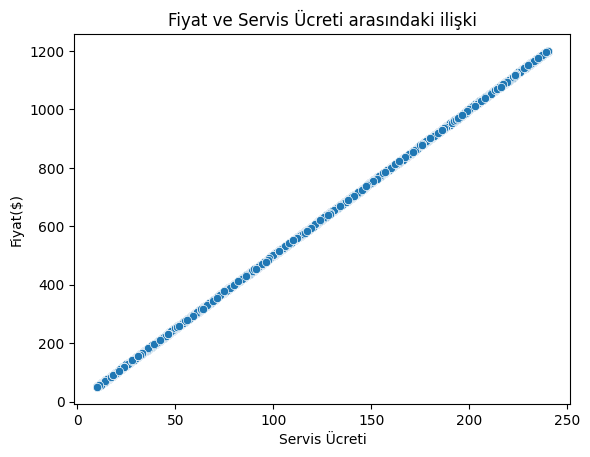

In [43]:
sns.scatterplot(x="SERVICE FEE", y="PRICE", data=df)
plt.title('Fiyat ve Servis Ücreti arasındaki ilişki')
plt.xlabel('Servis Ücreti')
plt.ylabel('Fiyat($)')
plt.show()



*   Fiyat ve servis ücretinin doğru oranla bağıntılı olduğunu bu grafikten çok rahat görülebiliyor.



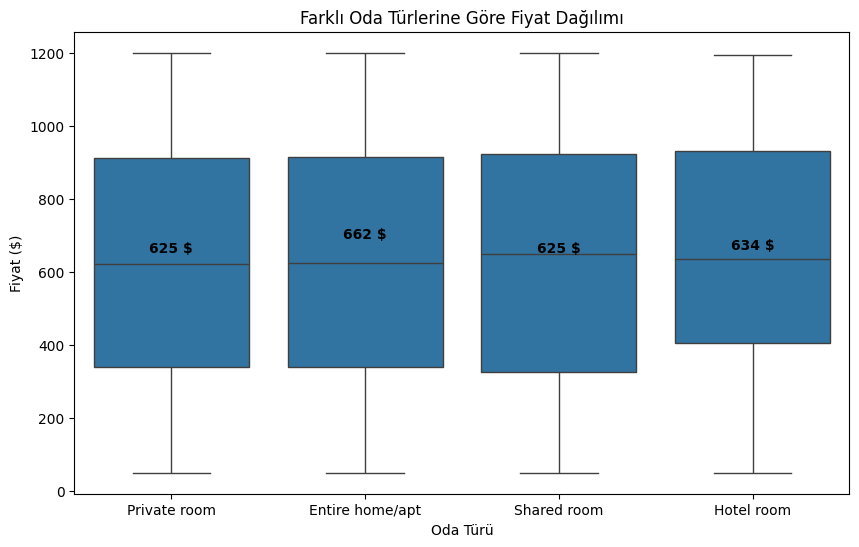

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ROOM TYPE', y='PRICE')
plt.title('Farklı Oda Türlerine Göre Fiyat Dağılımı')
plt.ylabel('Fiyat ($)')
plt.xlabel('Oda Türü')

# Ortalama fiyatları hesapla
mean_prices = df.groupby('ROOM TYPE')['PRICE'].mean()

# Ortalama fiyatları grafiğe yaz
for i, price in enumerate(mean_prices):
    plt.text(i, price + 20, f'{price:.0f} $', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


*  Oda türlerine göre fiyatlara baktığımızda, "Entire Home" (tüm ev) ilanlarının fiyatları diğer türlere göre daha geniş bir aralığa yayılmış. "Hotel Room" türü ise en dar aralığa sahip, bu da fiyatların bu türde genelde belli seviyeden yüksek olduğunu gösteriyor.

* Ortalama fiyatlara göre en pahalı oda türü "Entire Home". Onu sırasıyla "Hotel Room", "Private Room" (özel oda) ve "Shared Room" (paylaşımlı oda) takip ediyor. Kısacası, ne kadar fazla alan size aitse, fiyat da o kadar artıyor diyebiliriz.


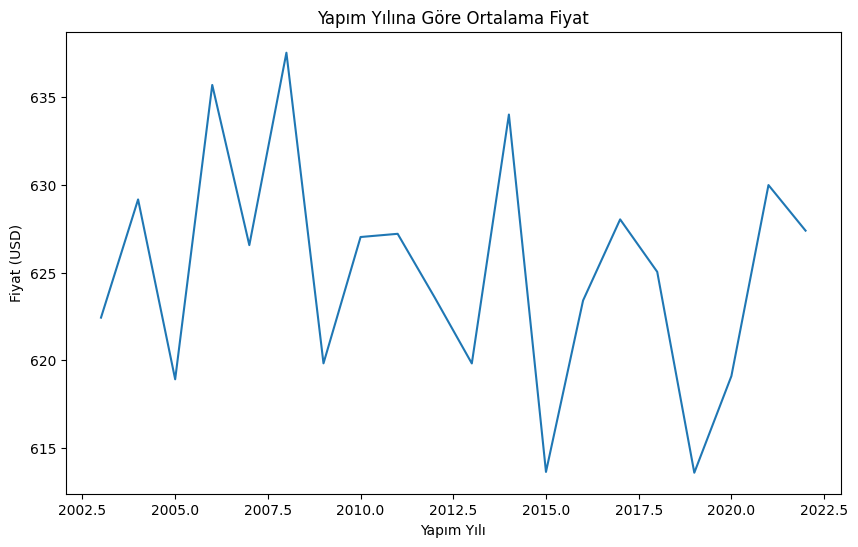

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='CONSTRUCTION YEAR', y='PRICE', estimator='mean', errorbar=None)
plt.title('Yapım Yılına Göre Ortalama Fiyat')
plt.ylabel('Fiyat (USD)')
plt.xlabel('Yapım Yılı')
plt.show()

* Grafikte, binaların yapım yılına göre ilanların ortalama fiyatları görülüyor. Net bir artış ya da azalış eğilimi yok, ama bazı yıllarda fiyatların ciddi şekilde yükseldiği ya da düştüğü görünüyor.

* 2006-2008 yılları arasında fiyatlar diğer yıllara göre daha yüksek görünüyor.

* 2015 ve 2019 yıllarında yapılmış binalarda ise en düşük fiyatlar mevcut.


Text(0.5, 0, 'Bina Yapım Yılı')

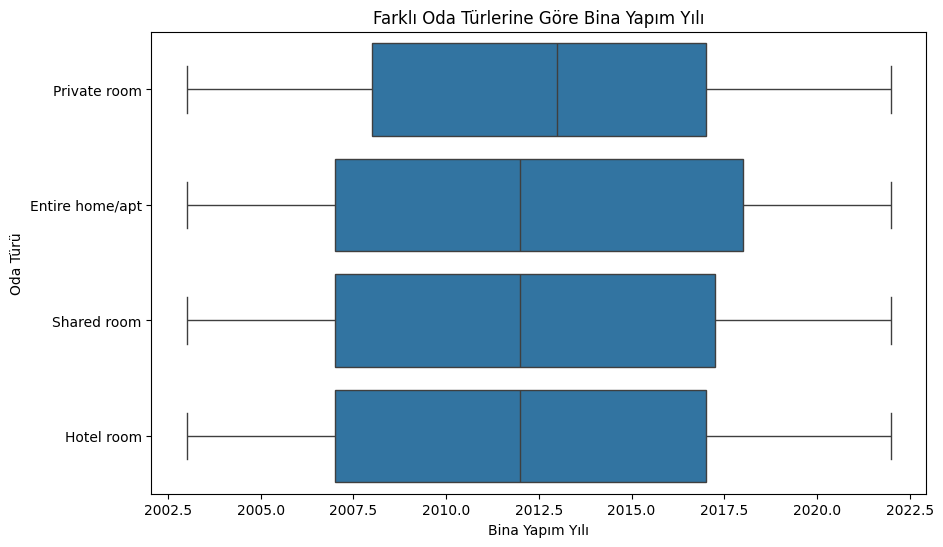

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CONSTRUCTION YEAR", y="ROOM TYPE", data=df)
plt.title('Farklı Oda Türlerine Göre Bina Yapım Yılı')
plt.ylabel('Oda Türü')
plt.xlabel('Bina Yapım Yılı')



*   Özel odaların kiralanabildiği binalar genel olarak her dönemde yaygın. Fakat ortalama yaş olarak diğerlerinden daha genç gibi görülüyor. ( Diğer tiplerde ortalama 2012,5 ama özel odalar özelinde bu değer 2013 gibi bir değerde.)

* Paylaşımlı odalar ve otel odaları benzerlik gösteriyor ama genel olarak paylaşımlı olarak kullanılan odaların bulunduğu binaların, otel odalarının bulunduğu binalardan daha yeni yapılar olduğu söylenebilir.

*   Bütün evin kiralandığı binalar ise aralarında en genç binalar olma eğiliminde olduğu görülüyor.


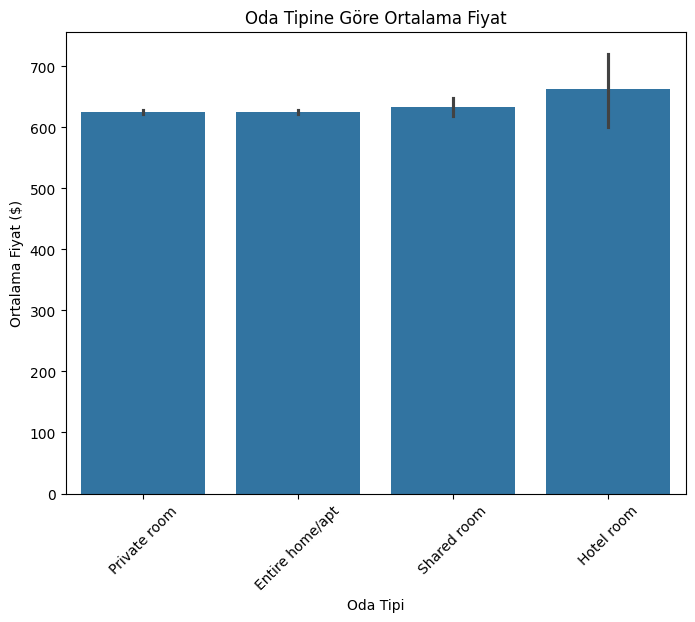

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='ROOM TYPE', y='PRICE', estimator='mean')
plt.title('Oda Tipine Göre Ortalama Fiyat')
plt.ylabel('Ortalama Fiyat ($)')
plt.xlabel('Oda Tipi')
plt.xticks(rotation=45)
plt.show()



*   Özel Oda ile Bütün ev ilanlarının ortalama fiyatları neredeyse aynı çıkıyor. Bu normal olarak çok da mantıklı bir şey değil, çünkü kiralanan alan ne kadar büyük olursa onun daha pahalı olması beklenir. Bunun konumdan kaynaklandığını düşünüyorum.
*  Aynı şekilde Paylaşımlı Oda seçeneğinin de diğerlerinden pahalı çıkması garip, diğer ikisine göre çok daha küçük bir alan sonuçta.

* Bu grafikte bana tek mantıklı gelen fiyat ortalaması Hotel Room için. Çünkü Otel odalarında, oda ile birlikte bir servis hizmeti de alınmakta. Diğer üç seçenekten daha pahalı olması beklenen bir şey.



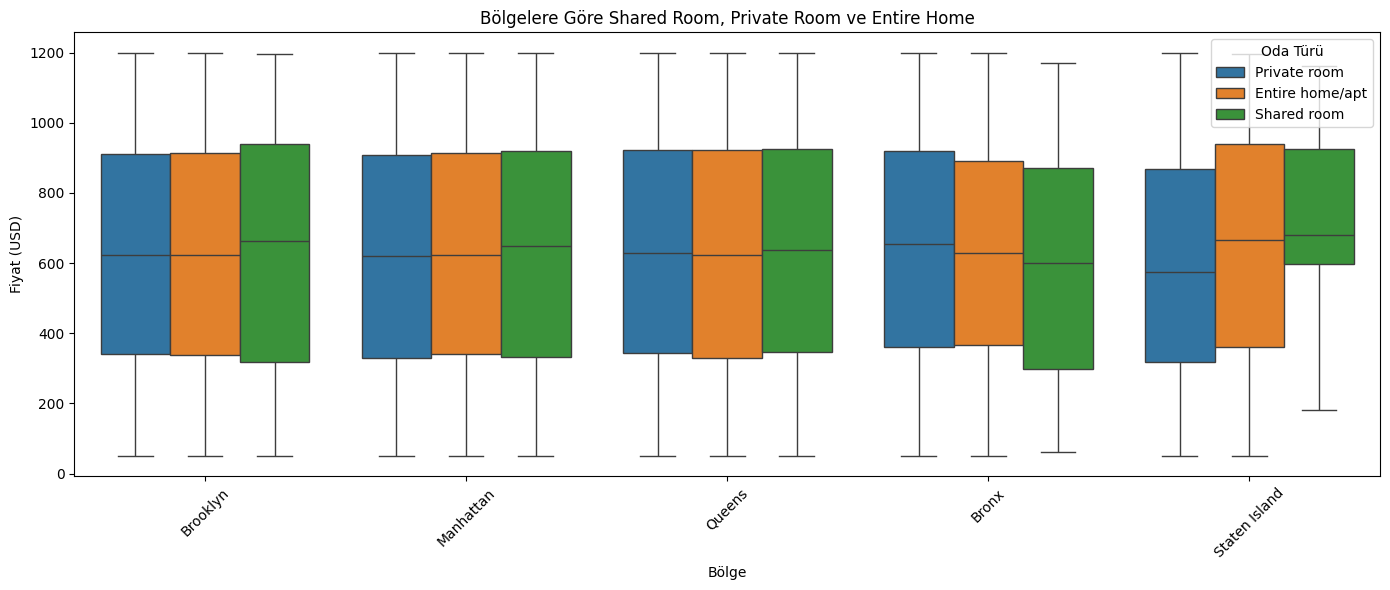

In [48]:
# Sadece ilgili oda türlerini filtrele
filtered_df = df[df['ROOM TYPE'].isin(['Shared room', 'Private room', 'Entire home/apt'])]

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='NEIGHBOURHOOD GROUP', y='PRICE', hue='ROOM TYPE')
plt.title('Bölgelere Göre Shared Room, Private Room ve Entire Home')
plt.xlabel('Bölge')
plt.ylabel('Fiyat (USD)')
plt.xticks(rotation=45)
plt.legend(title='Oda Türü')
plt.tight_layout()
plt.show()

Burada bölge özelinde karşılaştırmaya gideceğim.



* **Brooklyn:** Özel oda ve bütün ev fiyatları hemen hemen aynı. Medyan olarak da birbirine yakınlar. Bu bölgeden ev kiralarken, bütün ev tercihi yapmak çok daha hesaplı olabilir (çünkü bütün ev daha geniştir). Paylaşımlı odalar ise hem daha düşük, hem de çok daha pahalı ilanlara sahip. Yine de medyan çizgisi yukarıda. Bu da düşük fiyatlı ilanlardansa, daha yüksek fiyatlı ilanların çok daha fazla bulunduğunu gösteriyor.

* **Manhattan:** Brooklyn’e göre daha stabil bir dağılım mevcut. Buradaki özel oda ve bütün ev ilanları, Brooklyn ile neredeyse aynı görünüyor. Fiyat karşılaştırmasında, konumun bu iki mahalle için ayırt edici bir özellik olmadığı gözlemleniyor. Paylaşımlı oda seçeneğinde ise yüksek fiyatlı ilanların daha az olduğu, ama yine de medyan değerinin değişmediği görülüyor. Bu, Brooklyn’deki en ucuz paylaşımlı oda ilanlarının, Manhattan’daki en ucuz paylaşımlı oda ilanlarından daha düşük fiyatlı olduğunu gösteriyor.

* **Queens:** Bu mahallede yer alan özel oda ilanlarının, şu ana kadar incelediğimiz diğer iki mahalleye göre daha pahalı olduğunu görüyoruz. En ucuz ilan daha pahalı, medyan değerimiz ise daha yukarıda. Diğer iki mahallede özel oda ve bütün ev seçenekleri neredeyse aynıyken, burada bütün ev ilanlarının fiyatları özel oda seçeneğine göre daha düşük kalıyor. Medyan çizgisi daha aşağıda. Özel oda ilanlarından daha ucuza bütün ev kiralanabiliyor. Paylaşımlı oda ilanları ise neredeyse özel odalarla aynı seviyede; hatta en pahalı paylaşımlı oda ilanı, en pahalı özel oda ilanından daha yüksek fiyatlı gibi görünüyor.

* **Bronx:** Paylaşımlı oda ilanlarının, diğer iki seçeneğe göre ilk ve son kez daha düşük olduğu mahalle. Bununla birlikte, özel oda ilanlarının, bütün ev ilanlarına göre çok daha pahalı oluşu oldukça ilginç. Özel ve paylaşımlı oda özelinde medyanlara bakıldığında, bütün ev ilanlarının çoğunun özel odalardan daha ucuz olduğu görülüyor.

* **Staten Island:** Aralarında en sıra dışı dağılıma sahip olan mahalle gibi görünüyor. Özellikle paylaşımlı oda seçeneğinin bu kadar yukarıda olması oldukça dikkat çekici. Tüm mahalleler arasında en yüksek paylaşımlı oda ilanlarına sahip olanı. Medyan çizgisi her ne kadar aşağıda yer alsa da, fazlasıyla aykırı değer içeriyor gibi. Bu durum, paylaşımlı odanın bulunduğu binanın yaşı ile de ilgili olabilir. Bununla birlikte, bütün ev ve özel oda ilanlarının dağılımı ise ilk kez beklendiği gibi: Bütün ev ilanları, özel oda ilanlarına göre açık bir farkla daha pahalı.

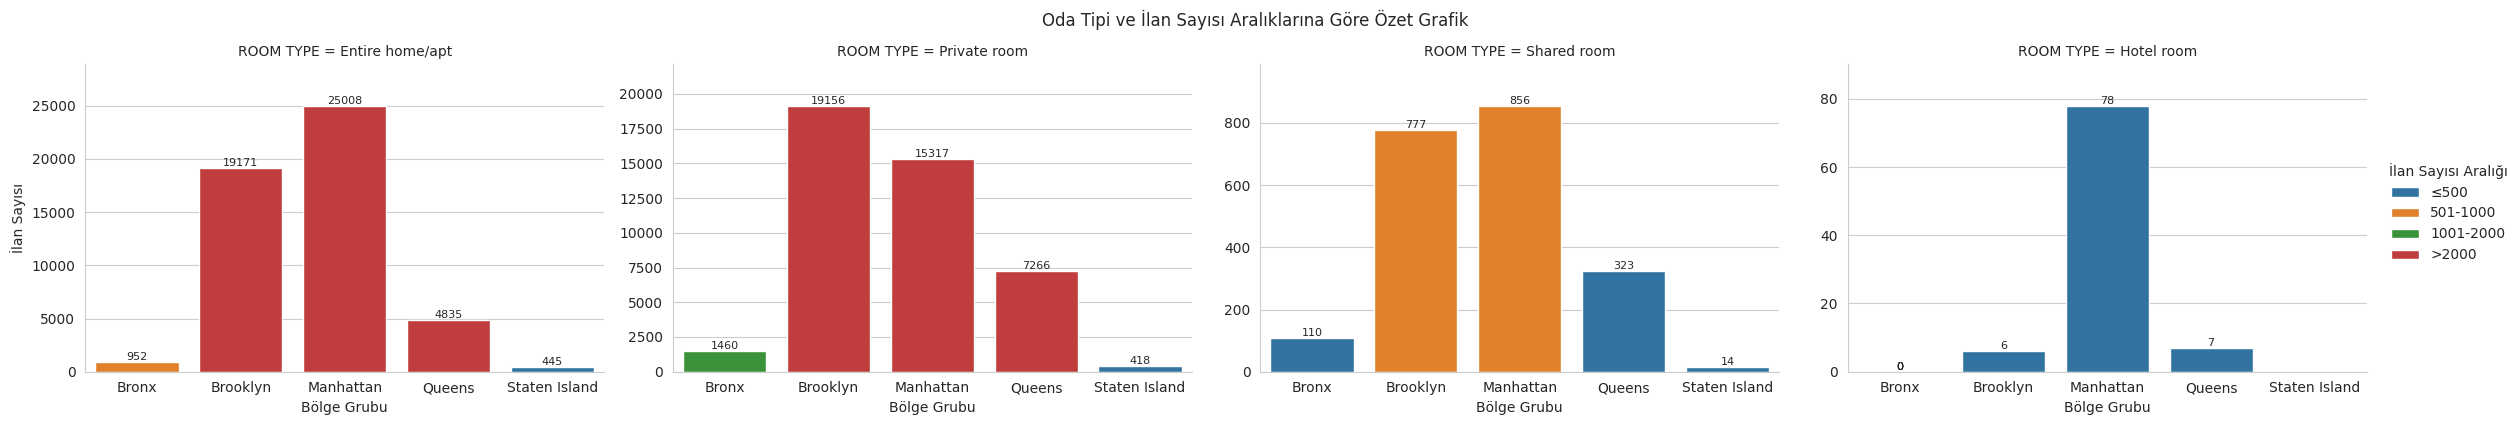

In [49]:

counts = (
    df
    .groupby(['NEIGHBOURHOOD GROUP', 'ROOM TYPE'])
    .size()
    .reset_index(name='n_listings')
)

# İlan sayılarını aralıklara yerleştir
bins   = [-1, 500, 1000, 2000, counts['n_listings'].max()]
labels = ['≤500', '501-1000', '1001-2000', '>2000']
counts['bin'] = pd.cut(counts['n_listings'], bins=bins, labels=labels)

# Her oda tipi ayrı grafikte
sns.set_style('whitegrid')
g = sns.catplot(
    data=counts,
    x='NEIGHBOURHOOD GROUP',
    y='n_listings',
    hue='bin',
    col='ROOM TYPE',
    kind='bar',
    height=4,
    aspect=1.5,
    order=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    sharey=False
)

# Başlık ve eksen metinleri
g.fig.suptitle('Oda Tipi ve İlan Sayısı Aralıklarına Göre Özet Grafik', y=1.05)
g.set_axis_labels('Bölge Grubu', 'İlan Sayısı')
g._legend.set_title('İlan Sayısı Aralığı')


for ax in g.axes.flatten():
    top = ax.get_ylim()[1]
    ax.set_ylim(0, top * 1.10)

for ax in g.axes.flatten():
    for p in ax.patches:
        value = int(p.get_height())
        ax.annotate(f'{value}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

plt.show()




*   **Entire home/apt (Tüm ev/daire)**

Manhattan: Bu oda tipi için açık ara lider. Bu durum, Manhattan’ın yüksek turistik cazibesi, iş merkezlerine yakınlığı ve yatırım amaçlı alınmış evlerin kiralanmasıyla açıklanabilir.

Brooklyn: Yüksek arz var; Manhattan’a kıyasla daha düşük fiyatlı ancak popüler bir alternatif olabilir.

Queens: Görece daha düşük arz. Bu da daha az turistik talebin daha az olmasından kaynaklanıyor olabilir.

Bronx ve Staten Island: Sırasıyla 952 ve 445 ilan ile en az yoğunluk gösteren bölgeler.

Bu oda tipi için en büyük arz Manhattan ve Brooklyn’de yoğunlaşmış. Bu iki bölge, büyük ölçüde turistik ve konaklama açısından cazip alanlar.

*   **Private room (Özel oda)**

Brooklyn (19.156) ve Manhattan (15.317): Yine lider konumda. Öğrenciler, geçici konaklayanlar gibi daha bütçe odaklı misafirleri çekebilir.

Queens: 7.266 ilan ile üçüncü sırada.

Bronx: 1.460, Staten Island: Sadece 418 ilan.

Brooklyn ve Manhattan yine bu oda tipinde ön planda.

* **Shared Room (Paylaşımlı Oda)**

Genel olarak en az tercih edilen oda tipi. Manhattan’da bile bu oda tipinin sınırlı olması, arz-talep dengesizliğine işaret eder. Rekabet düşük olabilir ancak talep de kısıtlıdır. Verilerin dağılım sırası da değişmediğinden yorum yapılacak çok da bir şey yok burada.

* **Hotel Room (Otel Odası)**

Manhattan (78): Dikkate değer tek bölge.

Queens (7) ve Brooklyn (6): Marjinal sayılar.

Bronx ve Staten Island: Sıfır.

Airbnb’de otel odası sunmak, platformun doğası gereği sıra dışı karşılanır. Ancak bazı butik oteller veya apart oteller bu tür ilanlar verebilir.

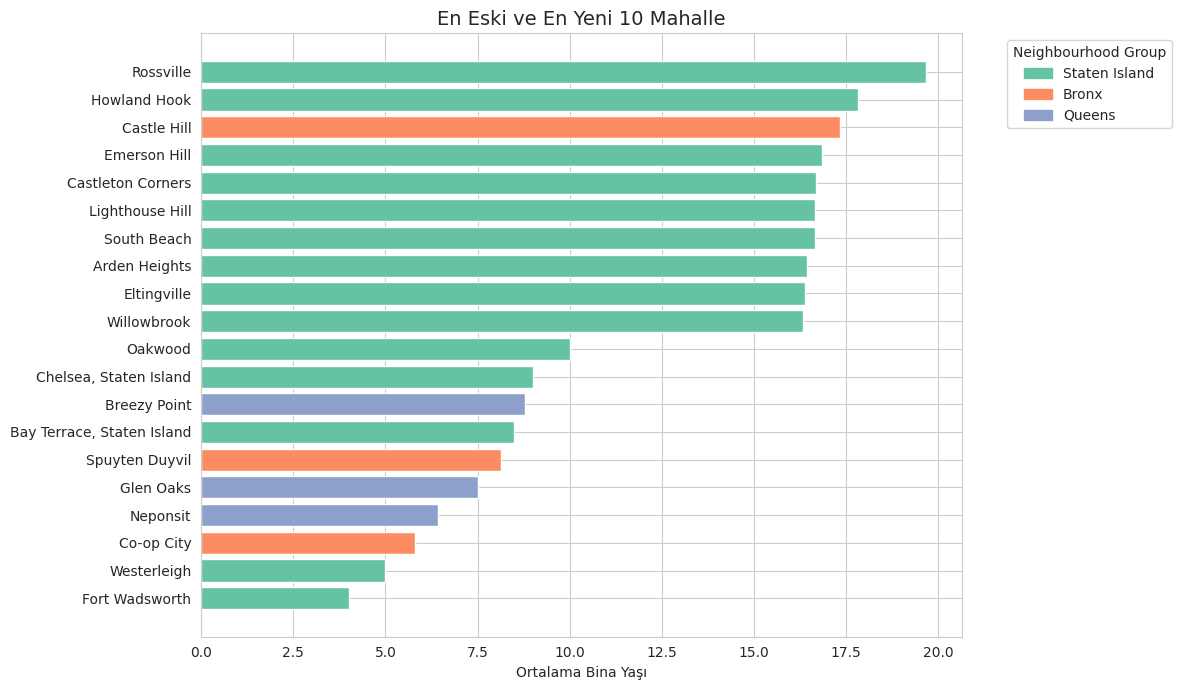

In [50]:
# Bina yaşı hesapla
df["BUILDING_AGE"] = 2025 - df["CONSTRUCTION YEAR"]

# Ortalama yaşa göre en eski ve en yeni mahalleleri bul
age_avg = df.groupby(["NEIGHBOURHOOD", "NEIGHBOURHOOD GROUP"])["BUILDING_AGE"].mean().reset_index()
oldest = age_avg.nlargest(10, "BUILDING_AGE")
newest = age_avg.nsmallest(10, "BUILDING_AGE")
combined = pd.concat([oldest, newest]).sort_values("BUILDING_AGE", ascending=False)

# Renk paleti
palette = sns.color_palette("Set2", combined["NEIGHBOURHOOD GROUP"].nunique())
group_colors = dict(zip(combined["NEIGHBOURHOOD GROUP"].unique(), palette))
combined["COLOR"] = combined["NEIGHBOURHOOD GROUP"].map(group_colors)

# Grafik
plt.figure(figsize=(12, 7))
plt.barh(combined["NEIGHBOURHOOD"], combined["BUILDING_AGE"], color=combined["COLOR"])
plt.title("En Eski ve En Yeni 10 Mahalle", fontsize=14)
plt.xlabel("Ortalama Bina Yaşı")
plt.gca().invert_yaxis()


from matplotlib.patches import Patch


handles = [Patch(color=c, label=g) for g, c in group_colors.items()]
plt.legend(handles=handles, title="Neighbourhood Group", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

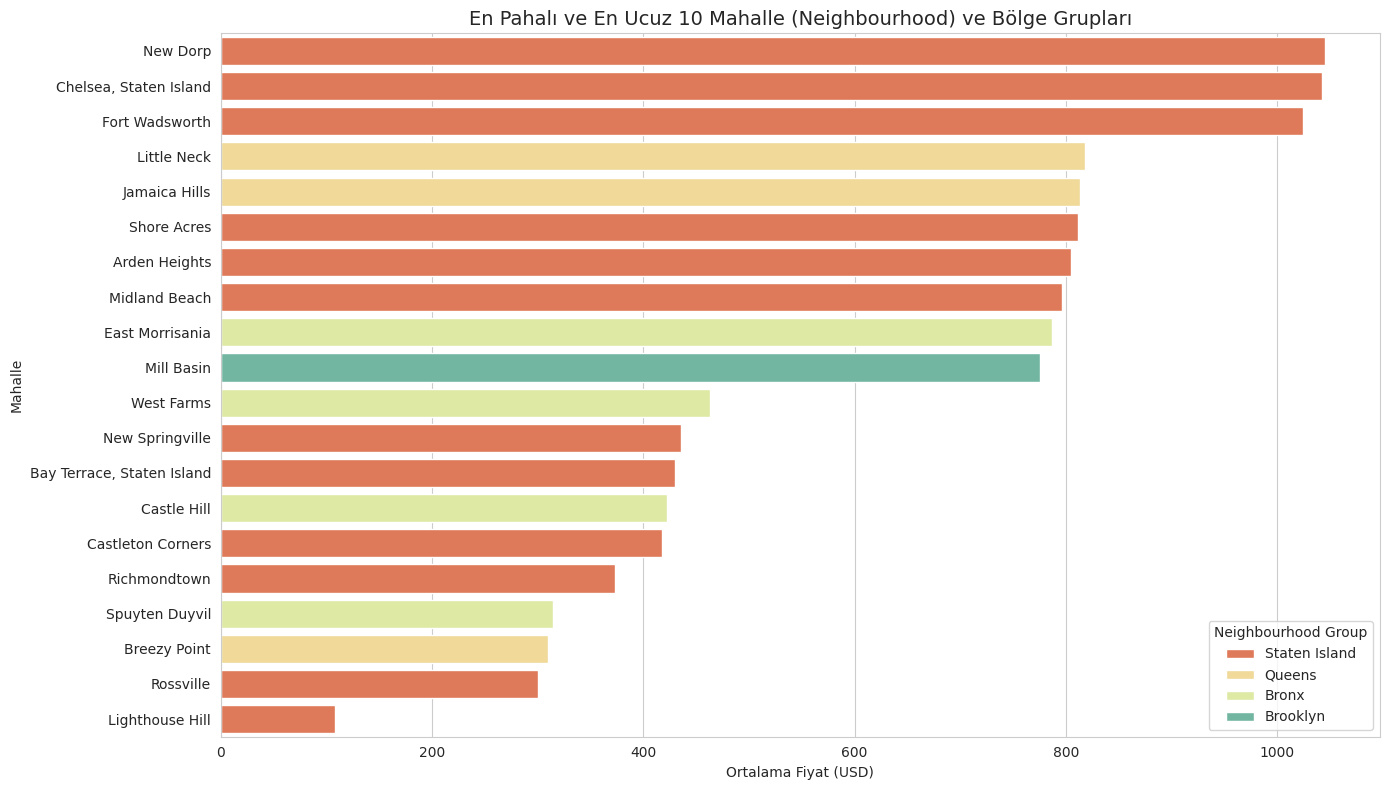

In [51]:

# Ortalama fiyatlara göre mahalleleri grupla
avg_prices = df.groupby(['NEIGHBOURHOOD', 'NEIGHBOURHOOD GROUP'])['PRICE'].mean().reset_index()

# En pahalı ve en ucuz 10 mahalleyi seç
top10_expensive = avg_prices.sort_values('PRICE', ascending=False).head(10)
top10_cheap = avg_prices.sort_values('PRICE', ascending=True).head(10)

# Birleştir
combined_df = pd.concat([top10_expensive, top10_cheap])

# Sıralı olarak göstermek için sıralı kategori tanımla
combined_df['NEIGHBOURHOOD'] = combined_df['NEIGHBOURHOOD'].astype(str)
combined_df = combined_df.sort_values('PRICE', ascending=False)
combined_df['NEIGHBOURHOOD'] = pd.Categorical(combined_df['NEIGHBOURHOOD'], categories=combined_df['NEIGHBOURHOOD'])

# Grafik çizimi
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df, x='PRICE', y='NEIGHBOURHOOD', hue='NEIGHBOURHOOD GROUP', palette='Spectral')

plt.title('En Pahalı ve En Ucuz 10 Mahalle (Neighbourhood) ve Bölge Grupları', fontsize=14)
plt.xlabel('Ortalama Fiyat (USD)')
plt.ylabel('Mahalle')
plt.legend(title='Neighbourhood Group')
plt.tight_layout()
plt.show()


Bina yaşı olarak en eski mahalle ve fiyat olarak en ucuz mallelerin bulunduğu iki grafiği burada birlikte yorumlayacağım.

İlk grafikte;

*   Rossville, Howland Hook, Castle Hill, Emerson Hill, Castleton Corners gibi mahallelerde ortalama bina yaşı 17–20 yıl civarında. Bu mahallelerin neredeyse tamamı Staten Island’da. Castle Hill gibi Bronx’taki mahalleler de listede yer alıyor. Bronx da eski konutlara sahip bir bölge olarak öne çıkıyor. Fort Wadsworth, Westerleigh, Co-op City, Neponsit, Glen Oaks gibi mahallelerin bina yaşı ortalama 3–7 yıl arasında. Bu mahallelerin çoğu yine Staten Island ve Queens’te yer almakta. Staten Island da hem yeni hem de eski binalar var anlamına geliyor.

İkinci grafikte ise;

* New Dorp, Chelsea (Staten Island), Fort Wadsworth, Arden Heights, Midland Beach, Shore Acres, Little Neck, Jamaica Hills var. Bu mahallelerin büyük kısmı Staten Island’da.

* Fort Wadsworth, aynı zamanda en yeni mahallelerden biri. Bu, yeni binaların bulunduğu mahallelerin kiralama fiyatlarını yukarı çektiğini gösteriyor.

* Chelsea (Staten Island), hem yeni hem pahalı olduğunun görülmesi de buna işaret ediyor.

* Lighthouse Hill, Rossville, Spuyten Duyvil, Breezy Point, Castle Hill, Richmondtown, Mill Basin gibi mahallelerde ortalama fiyat 250–400 USD aralığında.

* Rossville ve Castle Hill, hem en eski mahalleler arasında hem de en ucuzlar arasında.
→ Bu mahallelerdeki yaşlı binaların fazla oluşu, fiyatın düşük olmasına neden olmuş gibi görünüyor.

* Lighthouse Hill ise en eski binaların bulunduğu mahalle olmasa da(onlardan birisi) en ucuz mahalle. İnternetten bu mahalle özelinde araştırma yaptığımda adı üzerinde bir tepede bulunduğunu gördüm, bu da ulaşımın daha zor olduğunu ve bu nedenle daha ucuz olabileceğini düşündürttü bana.



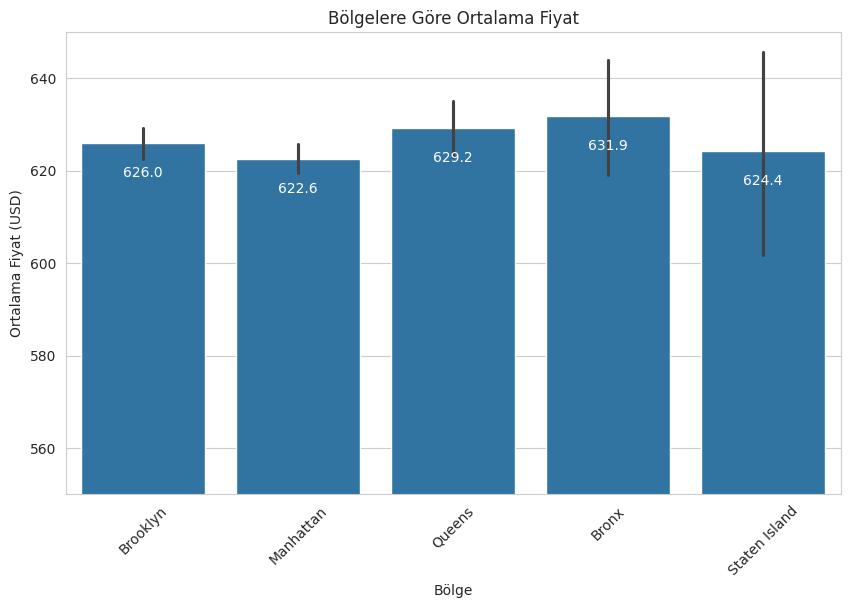

In [52]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x='NEIGHBOURHOOD GROUP', y='PRICE', estimator='mean')
plt.title('Bölgelere Göre Ortalama Fiyat')
plt.ylabel('Ortalama Fiyat (USD)')
plt.xlabel('Bölge')
plt.xticks(rotation=45)

# Y eksenini yakınlaştır
plt.ylim(550, 650)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 5, f'{height:.1f}',
            ha='center', va='top', color='white', fontsize=10)

plt.show()



*   Yukarıda gördüğümüz gibi, sapmanın en çok olduğu mahalle grubu Staten Island. Onu, yine daha önce grafiklerde gördüğümüz Bronx takip ediyor. Sonra, sırasıyla Queens, Brooklyun ve Manhattan takip ediyor. Bu sapmanın nedeninin bu bölgelerdeki binaların yaşları ile alakalı olduğunu görmüş olduk.

* Ortalama olarak en pahalı mahalle sıralaması Bronx, Queens, Brooklyn, Staten Island ve Manhattan şeklinde.


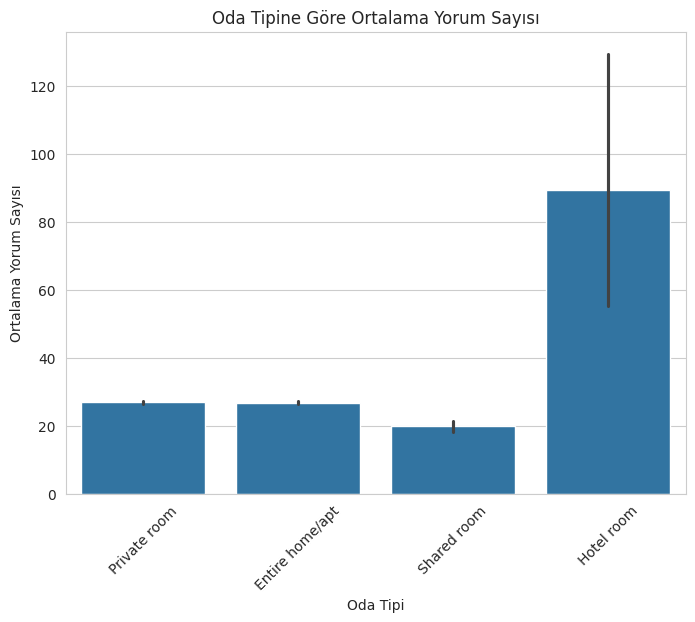

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='ROOM TYPE', y='NUMBER OF REVIEWS', estimator='mean')
plt.title('Oda Tipine Göre Ortalama Yorum Sayısı')
plt.ylabel('Ortalama Yorum Sayısı')
plt.xlabel('Oda Tipi')
plt.xticks(rotation=45)
plt.show()

* Hotel room (Otel odası): Açık ara en fazla yorum alan oda türü. Ortalama yorum sayısı diğerlerine göre çok daha yüksek. Ancak çubuğun üzerindeki hata çubuğu (siyah çizgi) çok uzun — bu da yorum sayılarının çok değişken olduğunu gösteriyor.

* Private room (Özel oda) ve Entire home/apt (Tüm ev/daire): Benzer seviyede, ortalama olarak orta düzeyde yorum almışlar. Aralarında büyük bir fark yok.

* Shared room (Paylaşımlı oda): En az yorum alan oda türü. Kullanıcılar ya bu türü daha az tercih ediyor ya da bu odalara dair yorum yapma eğilimi daha düşük olabilir.

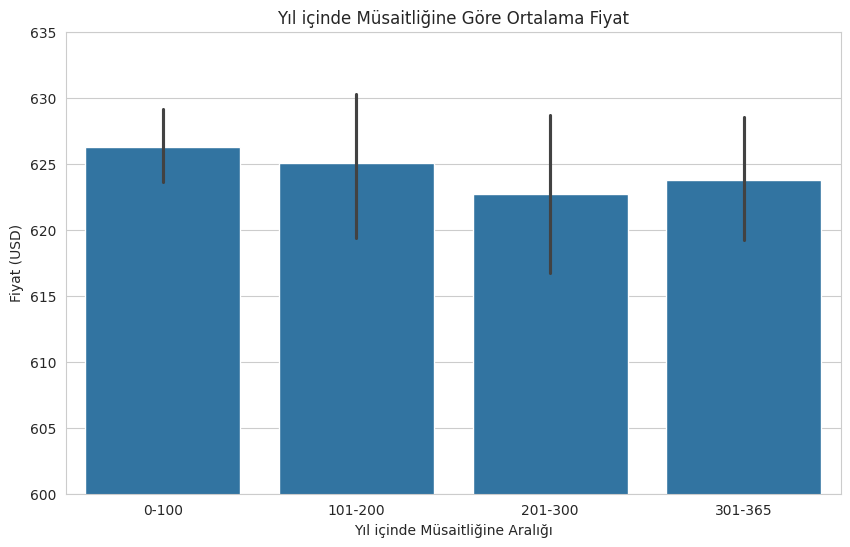

In [54]:
df['availability_group'] = pd.cut(df['AVAILABILITY 365'], bins=[0, 100, 200, 300, 365], labels=['0-100','101-200','201-300','301-365'])
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='availability_group', y='PRICE')

plt.ylim(600, 635)

plt.title('Yıl içinde Müsaitliğine Göre Ortalama Fiyat')
plt.ylabel('Fiyat (USD)')
plt.xlabel('Yıl içinde Müsaitliğine Aralığı')
plt.show()


*  Müsaitlik süresi azaldıkça (örneğin, 0-100 gün), fiyatların biraz daha yüksek olduğu gözlemleniyor.

*  Müsaitlik süresi arttıkça (örneğin, 201-300), fiyatlar bir miktar düşüyor, ancak aradaki fark oldukça küçük.

*  Fiyatlar genel olarak 623–626 USD aralığında. Yani dramatik bir fark yok.

*  **Fiyatın çok fazla değişmemesi, müsaitlik süresinin fiyat üzerinde büyük bir etki yaratmadığını gösteriyor.**

*  Ancak standart sapmalar bazı aralıklarda belirgin olduğundan, özellikle 101-200 ve 201-300 gün aralığında fiyatların öngörülemezliği biraz daha yüksek gibi görünüyor.

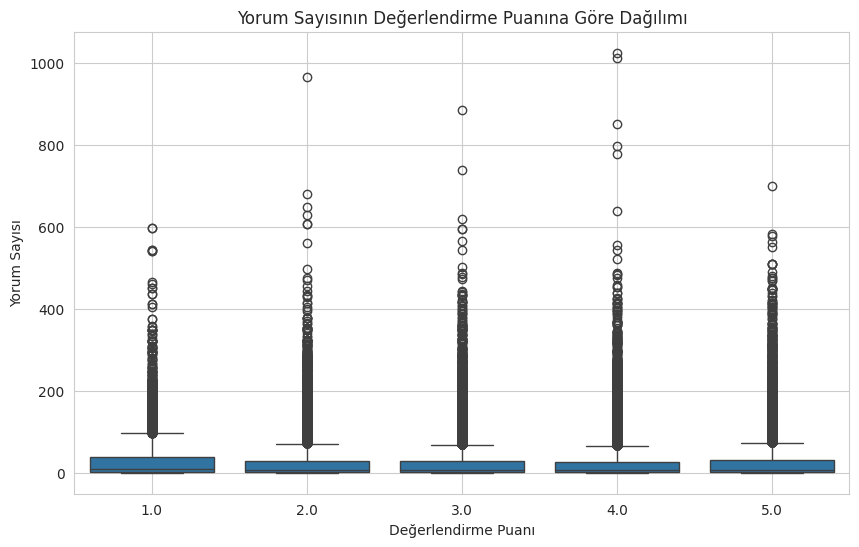

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='REVIEW RATE NUMBER', y='NUMBER OF REVIEWS')
plt.title('Yorum Sayısının Değerlendirme Puanına Göre Dağılımı')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Yorum Sayısı')
plt.grid(True)
plt.show()

* Tüm değerlendirme puanlarında (1-5) yorum sayılarında ciddi aykırı değerler var. Yani, bazı ilanlar, diğerlerine göre çok daha fazla yorum almış.

* Bazı ilanlarda ise yorum sayısı 1000’in üzerine çıkmış.

* Medyan yorum sayısı (kutunun ortasındaki çizgi) her puan için oldukça düşük, muhtemelen 20-30 yorum civarında. Bu, çoğu ilanın az yorum aldığı anlamına gelir.

 Boxplot'ların yapısı benzer:

* Hiçbir puan seviyesi (örneğin: sadece 5 puan alanlar) belirgin şekilde daha fazla yorum almıyor gibi görünüyor.

* **Yani yorum sayısı ile değerlendirme puanı arasında doğrudan bir ilişki yok.**

* Aykırı değerlerin (outliers) çoğu 3, 4 ve 5 puanlarda yoğunlaşmış gibi görünüyor.

* Bu, yüksek puanlı ürünlerin daha fazla yorum alma eğiliminde olabileceğini ima ediyor olabilir. Ancak bu çok net değil, dağılım oldukça simetrik görünüyor.

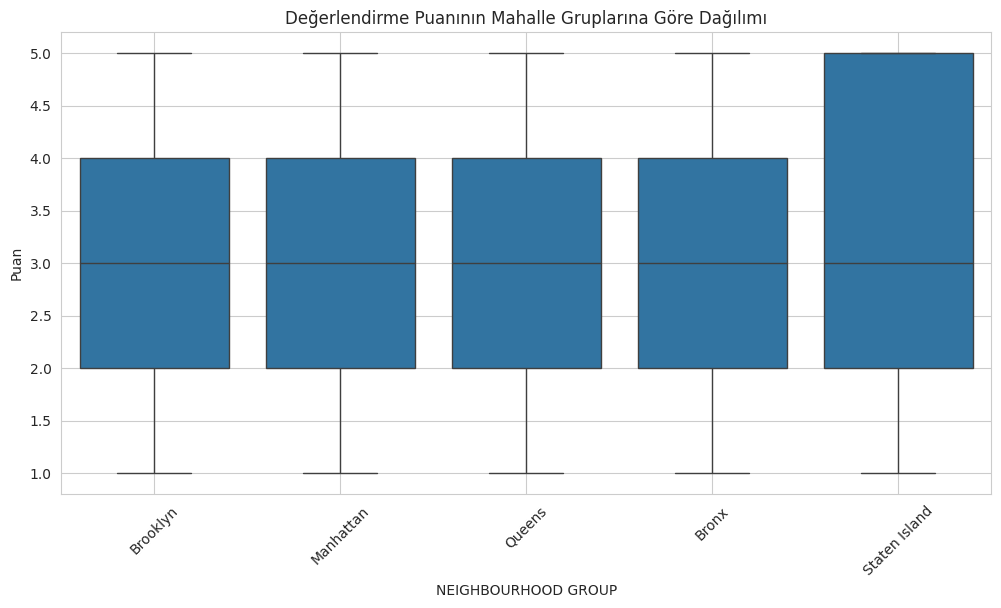

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='NEIGHBOURHOOD GROUP', y='REVIEW RATE NUMBER')
plt.title('Değerlendirme Puanının Mahalle Gruplarına Göre Dağılımı')
plt.xticks(rotation=45)
plt.ylabel('Puan')
plt.grid(True)
plt.show()




*   Staten Island dışında yer alan mahalle gruplarındaki değerlendirme puanları eşit şekilde dağılmış olarak görülüyor.
*   Staten Island için ise, medyan diğerleri ile aynı (3) olarak görülmesine rağmen diğer bölgelere göre çok daha fazla 5 puan almış ilan mevcut. Müşterilerin memnuniyeti burada daha yüksek görülüyor.



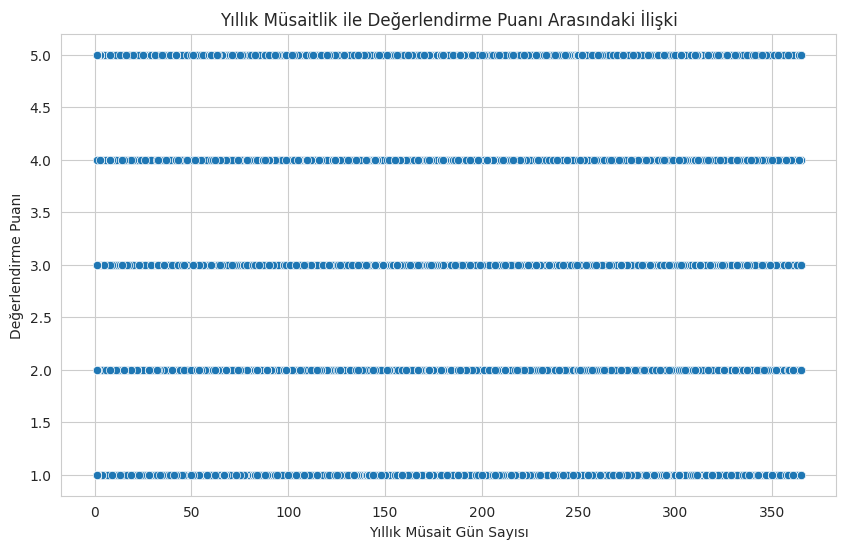

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AVAILABILITY 365', y='REVIEW RATE NUMBER')
plt.title('Yıllık Müsaitlik ile Değerlendirme Puanı Arasındaki İlişki')
plt.xlabel('Yıllık Müsait Gün Sayısı')
plt.ylabel('Değerlendirme Puanı')
plt.grid(True)
plt.show()

Yıl içinde müsaitlik ve değerlendirme puanı arasında bahsedilebilecek bir ilişki bulunmadığı görülüyor.

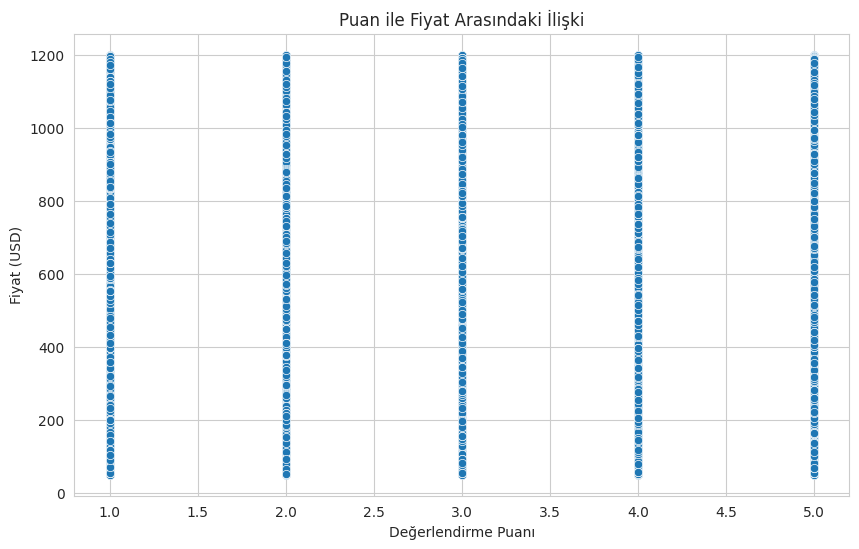

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='REVIEW RATE NUMBER', y='PRICE')
plt.title('Puan ile Fiyat Arasındaki İlişki')
plt.ylabel('Fiyat (USD)')
plt.xlabel('Değerlendirme Puanı')
plt.show()

Değerlendirme puanı ile fiyat arasında bahsedilebilecek bir ilişki bulunmadığı görülüyor.

<ipython-input-59-16ca73379c87>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('REVIEW_BIN')['REVIEW RATE NUMBER'].mean().reset_index()


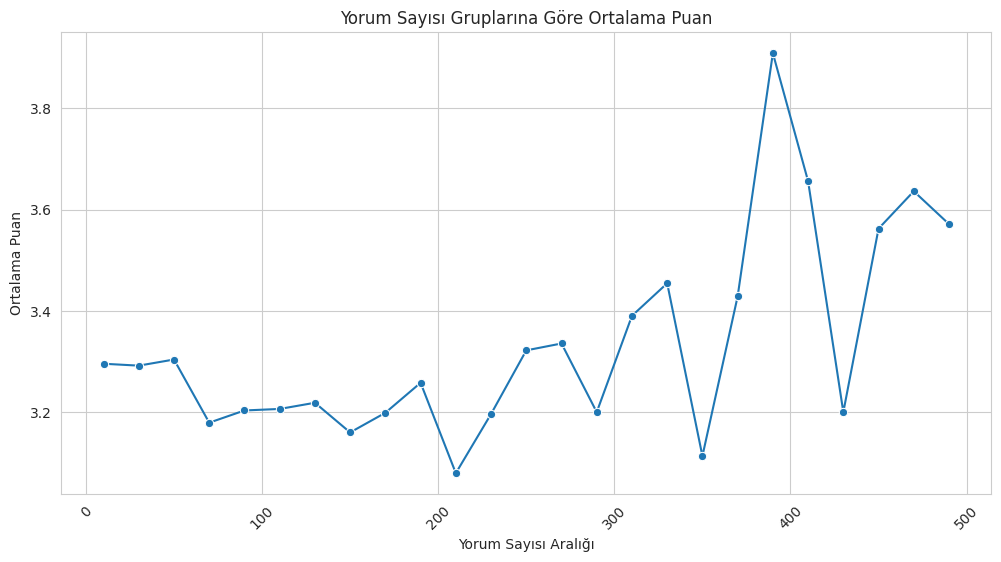

In [59]:
# Yorum sayılarını bin'lere ayır
df['REVIEW_BIN'] = pd.cut(df['NUMBER OF REVIEWS'], bins=range(0, 501, 20))

# Her yorum aralığı için ortalama puanı hesapla
grouped = df.groupby('REVIEW_BIN')['REVIEW RATE NUMBER'].mean().reset_index()

# Aralığın alt ve üst sınırlarını çıkar
grouped[['lower_bound', 'upper_bound']] = grouped['REVIEW_BIN'].astype(str).str.extract(r'\((.*?),(.*?)\]').astype(float)

# Orta noktayı hesapla: (alt + üst) / 2
grouped['REVIEW_BIN_MID'] = (grouped['lower_bound'] + grouped['upper_bound']) / 2

plt.figure(figsize=(12,6))
sns.lineplot(data=grouped, x='REVIEW_BIN_MID', y='REVIEW RATE NUMBER', marker='o')
plt.xticks(rotation=45)
plt.title('Yorum Sayısı Gruplarına Göre Ortalama Puan')
plt.xlabel('Yorum Sayısı Aralığı')
plt.ylabel('Ortalama Puan')
plt.show()

* Grafik çok düz değil; yorum sayısı arttıkça puanlarda dalgalanma var. 350-400 yorum aralığında zirve mevcut. Ortalama puan neredeyse 3.9’a çıkmış.

* **Düşük Yorum Sayıları (<100):**

 Ortalama puan genellikle 3.2–3.3 civarında.

 Bu seviyede istikrar gözleniyor, çok büyük bir değişim yok.

* **Orta Aralıkta Dalgalanmalar (100–300):**

 Ortalama puanlar bu bölgede en düşük seviyelere iniyor (yaklaşık 3.1 civarına).

 Bu durum, orta düzeyde yoruma sahip ilanların kullanıcılar tarafından daha fazla eleştiriye maruz kalabileceğini düşündürüyor.

* **Yüksek Yorum Sayıları (>300):**

 Genel olarak daha yüksek puanlar görülüyor.

 Bu da, çok sayıda yorum alan ilanların zamanla daha güvenilir/hizmet kalitesi yüksek hale geldiğini veya iyi hizmet verenlerin daha fazla yorum topladığını gösteriyor olabilir.

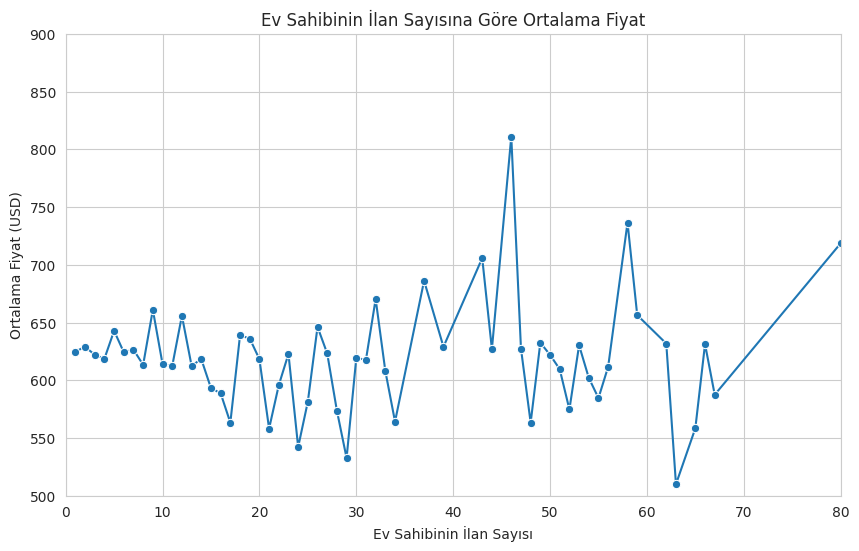

In [60]:
ortalama_fiyatlar = df.groupby('CALCULATED HOST LISTINGS COUNT')['PRICE'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=ortalama_fiyatlar, x='CALCULATED HOST LISTINGS COUNT', y='PRICE', marker='o')
plt.title('Ev Sahibinin İlan Sayısına Göre Ortalama Fiyat')
plt.xlabel('Ev Sahibinin İlan Sayısı')
plt.ylabel('Ortalama Fiyat (USD)')
plt.xlim(0, 80)  #Çok yüksek ilan sayısı olanları hariç tutmak için
plt.ylim(500, 900)
plt.show()

* **Genel Fiyat Aralığı:**

Ortalama fiyatlar genel olarak 550 – 700 USD arasında yoğunlaşmış.

Ancak bazı noktalarda 800 USD'nin üzerine çıkan ani sıçramalar var (örneğin 45 ve 60 civarında).

* **Dağılım:**

Grafik genel olarak dalgalı bir yapı sergiliyor.

**Yani ev sahibinin daha fazla ilana sahip olması fiyatı doğrudan arttırmıyor veya azaltmıyor.**

* **Düşük İlan Sayısı (1–10):**

Fiyatlar oldukça dengeli, 600–650 USD arasında dalgalanıyor.

Bu, az ilanı olan bireysel ev sahiplerinin benzer fiyatlama yaptığını gösteriyor olabilir.

* **Orta İlan Sayısı (10–40):**

Fiyatlar inişli çıkışlı. Belirli sayılarda düşüşler ve sıçramalar var.

30 ilan noktasıında fiyatlar görece düşük bir seviyeye iniyor.

* **Yüksek İlan Sayısı (40–80):**

Özellikle 45 ve 60 civarında ani zirveler var (örneğin 800 USD civarına sıçrama).

Bu ev sahiplerinin "lüks segment"te ya da daha pahalı bölgelerde ilan verdiğini düşündürüyor.

Ancak 65 noktasındaki en dip değer de mevcut. Ciddi dalgalanma var. Başta da dediğim gibi fiyatı doğrudan etkiliyor gibi görülmüyor.


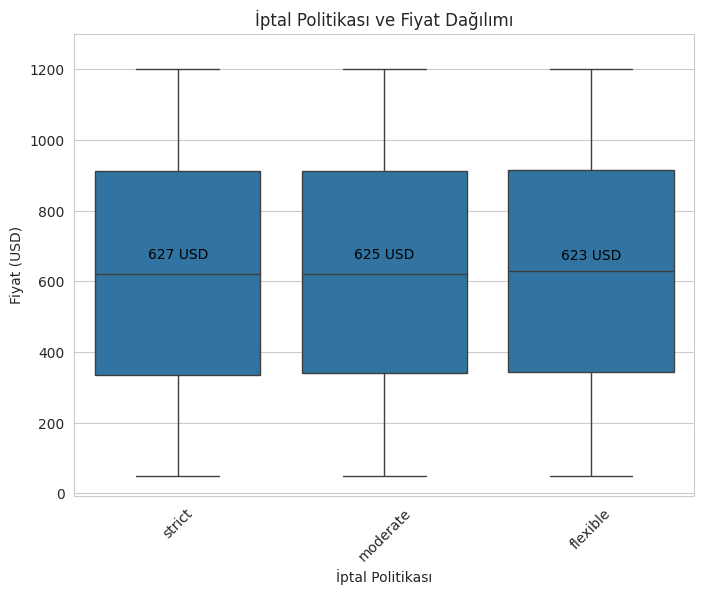

In [61]:

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='CANCELLATION_POLICY', y='PRICE')

# Ortalama değerleri hesapla
mean_prices = df.groupby('CANCELLATION_POLICY')['PRICE'].mean()

# Ortalama fiyatları grafiğe yaz
for i, (label, mean) in enumerate(mean_prices.items()):
    plt.text(x=i, y=mean + 30, s=f'{mean:.0f} USD',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('İptal Politikası ve Fiyat Dağılımı')
plt.ylabel('Fiyat (USD)')
plt.xlabel('İptal Politikası')
plt.xticks(rotation=45)
plt.ylim(top=1300)  # Yazılar üstte kaybolmasın diye üst limiti artır
plt.show()



*   İptal Politikası içinde yer alan üç seçenek arasında da fiyat bazlı dramatik bir fark görünmüyor. **İptal politikasının fiyat üzerinde bir etkisi olduğunu söyleyemeyiz.**


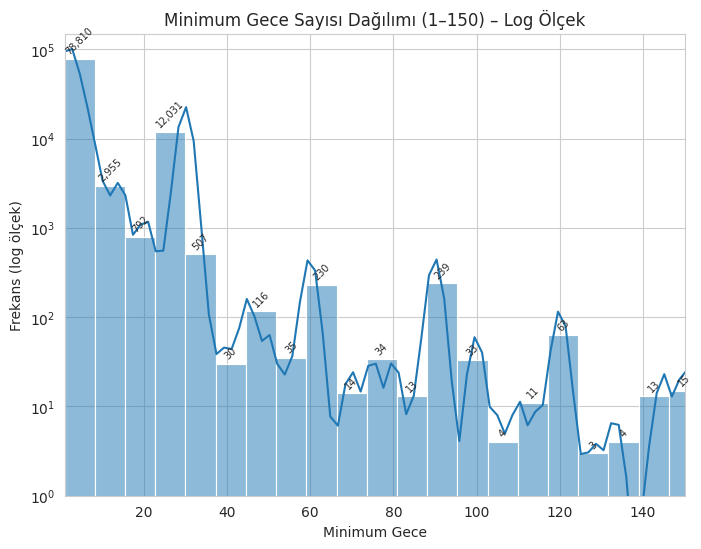

In [62]:

# Log skalasına göre ayarlanmış Histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(
    data=df[(df['MINIMUM NIGHTS'] > 0) & (df['MINIMUM NIGHTS'] < 365)],
    x='MINIMUM NIGHTS',
    bins=50,
    kde=True,
)

ax.set_yscale('log')
ax.set_ylim(bottom=1, top=150000)
ax.set_xlim(1, 150)
ax.set_xlabel('Minimum Gece')
ax.set_ylabel('Frekans (log ölçek)')
ax.set_title('Minimum Gece Sayısı Dağılımı (1–150) – Log Ölçek')


for bar in ax.patches:
    count = int(bar.get_height())
    if count == 0:
        continue
    ax.annotate(f'{count:,}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 2),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=7, rotation=45)

plt.show()



*   Grafik çok sağa çarpık bir dağılıma sahip. En yüksek frekans(sıklık), minimum 1 gece gerektiren ilanlarda görülüyor. Bu, en esnek ilanların çok daha yaygın olduğunu gösteriyor. (Fazla gün kalma kısıtlaması olmayan ilanlar daha kolay tercih edilebiliyor.) Frekans 100.000'e yaklaşmış, yani açık ara en yaygın tercih.

*   Minimum gece sayısı arttıkça ilan sayısı hızla azalıyor. 2–10 gece arası hâlâ bazı ilanlar mevcut, ancak frekans çok düşük.

* 30 gece civarında ikinci bir küçük tepe var.Bu, aylık kiralama yapan ev sahiplerinin sayısının belirgin olduğunu gösteriyor.

* Çok az sayıda ilan 100 gece ve üzeri minimum konaklama şartı koymuş. Bunlar muhtemelen özel koşullar içeren, uzun süreli kiralamaya yönelik mülkler.


Numeric columns: Index(['ID', 'HOST ID', 'LAT', 'LONG', 'CONSTRUCTION YEAR', 'PRICE',
       'SERVICE FEE', 'MINIMUM NIGHTS', 'NUMBER OF REVIEWS',
       'REVIEW RATE NUMBER', 'CALCULATED HOST LISTINGS COUNT',
       'AVAILABILITY 365', 'BUILDING_AGE'],
      dtype='object')


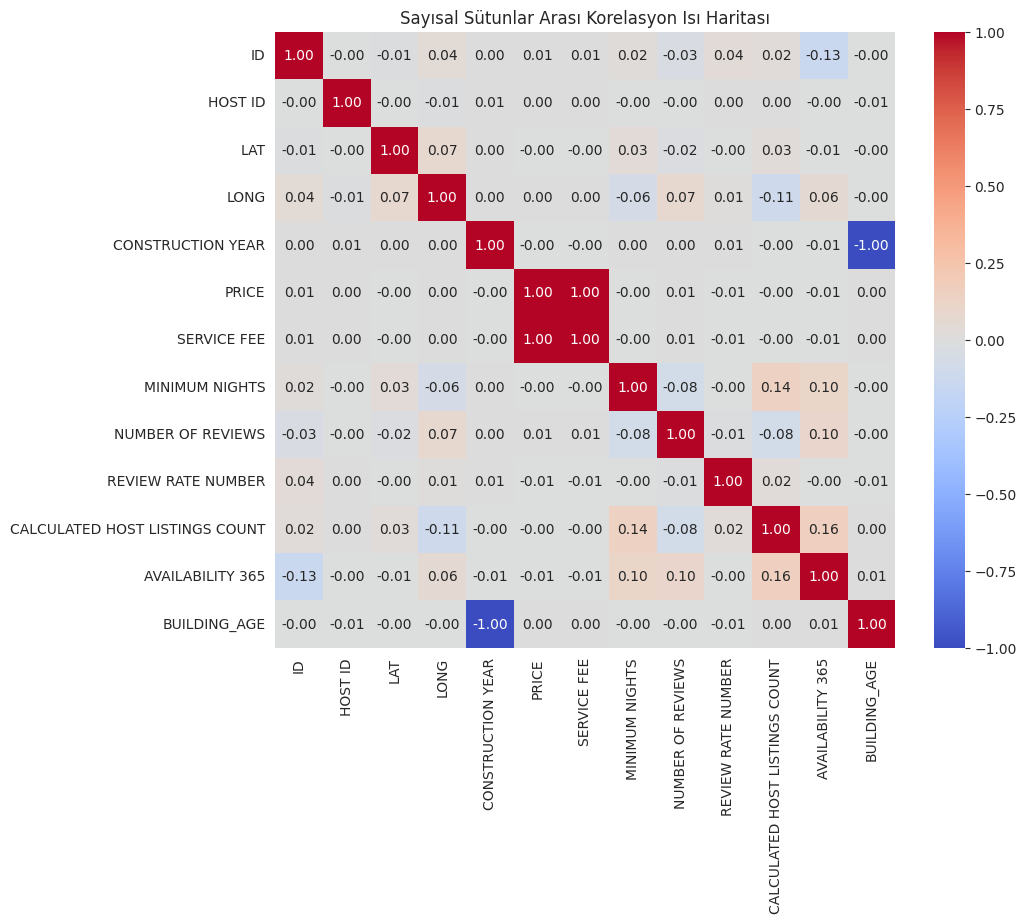

In [63]:
# Sayısal sütunları seç
df_numeric = df.select_dtypes(include='number')
print(f"Numeric columns: {df_numeric.columns}")

# Korelasyon matrisi
corr = df.select_dtypes(include='number').corr()

# Isı haritası çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Sütunlar Arası Korelasyon Isı Haritası')
plt.show()


* **PRICE ve SERVICE FEE: 1.00**
İlk grafikte de görmüştüm, bu iki veri arasında doğru orantı mevcut.
* **CONSTRUCTION YEAR ve BUILDING_AGE: -1.00**
Doğrudan matematiksel ilişkiyi yansıtır, yeni bina(yıl olarak büyük) daha düşük yaş demektir.
* **AVAILABILITY_365 - CALCULATED HOST LISTINGS COUNT: 0.16** Çok sayıda ilanı olan ev sahipleri, yıl boyunca daha uzun süre müsaitlik sağlıyor olabilir.

* **REVIEW RATE NUMBER - AVAILABILITY 365: 0.16** Daha uzun süre müsait olan ilanlar, daha yüksek değerlendirme puanı alıyor olabilir.

* **MINIMUM NIGHTS - CALCULATED HOST LISTINGS COUNT: 0.14** Ev sahibinin ilan sayısı arttıkça minimum gece sayısı biraz artabilir. Belki kurumsal yaklaşımla ilgili olabilir.

* **MINIMUM NIGHTS - AVAILABILITY 365: 0.10** Daha uzun minimum konaklama süresi sunan ilanlar, genellikle yıl boyunca da daha fazla açık kalıyor gibi duruyor.

* **NUMBER OF REVIEWS - AVAILABILITY 365: 0.10** Yıl boyunca daha fazla açık olan ilanlar,daha çok yorum alma eğiliminde olabilir.

* **CALCULATED HOST LISTINGS COUNT ile NUMBER OF REVIEWS: -0.08** Ev sahibi daha çok ilana sahipse, tekil ilan başına düşen yorum sayısı biraz daha düşük olabilir.

* **AVAILABILITY_365 ile ID: -0.13** Yeni ID'ler daha kısa süre yayında kalmıştır, dolayısıyla bu da zayıf bir negatif ilişki anlamına gelir.


In [64]:
#Burada her bir satırdaki evi harita üzerinde göstermek istedim. Daha detaylı incelemek için noktaların üstüne gelip bilgi alabilirsiniz

import folium

# Fiyat seviyesini sınıflandır
def get_price_level(price):
    if price < 300:
        return "low"
    elif price < 700:
        return "medium"
    else:
        return "high"

# Renk atama fonksiyonu
def get_color(price_level):
    return {
        "low": "green",
        "medium": "orange",
        "high": "red"
    }.get(price_level, "gray")

# Sınıf ve renk bilgilerini ata
df["price_level"] = df["PRICE"].apply(get_price_level)
df["color"] = df["price_level"].apply(get_color)

# Harita merkezini belirle
lat_center = df["LAT"].mean()
long_center = df["LONG"].mean()
m = folium.Map(location=[lat_center, long_center], zoom_start=11)

# Hafifletmek için örneklem al
df_sample = df.sample(n=2000, random_state=42)  # İstersen n=500 yap

# Noktaları çiz
for _, row in df_sample.iterrows():
    folium.CircleMarker(
        location=[row["LAT"], row["LONG"]],
        radius=4,
        color=row["color"],
        fill=True,
        fill_color=row["color"],
        fill_opacity=0.5,
        popup=f"Fiyat: {row['PRICE']} $USD <br>ROOM: {row['ROOM TYPE']}"
    ).add_to(m)

# Haritayı göster
m
# HTML olarak kaydet
#m.save('my_map.html')
#from google.colab import files
#files.download('my_map.html')

In [65]:
df.info()

#Kategorik değerlerimi numerik değerlerle değiştirmeden son bir kez verisetime bakıyorum.

<class 'pandas.core.frame.DataFrame'>
Index: 96199 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              96199 non-null  int64   
 1   HOST ID                         96199 non-null  int64   
 2   HOST_IDENTITY_VERIFIED          96199 non-null  object  
 3   HOST NAME                       96199 non-null  object  
 4   NEIGHBOURHOOD GROUP             96199 non-null  object  
 5   NEIGHBOURHOOD                   96199 non-null  object  
 6   LAT                             96199 non-null  float64 
 7   LONG                            96199 non-null  float64 
 8   COUNTRY                         96199 non-null  object  
 9   INSTANT_BOOKABLE                96199 non-null  object  
 10  CANCELLATION_POLICY             96199 non-null  object  
 11  ROOM TYPE                       96199 non-null  object  
 12  CONSTRUCTION YEAR     

In [66]:
#Bütün kategorik değerlerim için Label Encode kullanmak istedim. Bunun nedeni sonrasında yaptığım Isı Haritasının okunmasını çok zorlaştırmasıdır.

# LabelEncoder nesnesi oluşturmak ve veriyi dönüştürmek
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df[['NEIGHBOURHOOD']])
df['NEIGHBOURHOOD'] = encoded_data

encoded_data = label_encoder.fit_transform(df[['HOST NAME']])
df['HOST NAME'] = encoded_data

encoded_data = label_encoder.fit_transform(df[['ROOM TYPE']])
df['ROOM TYPE'] = encoded_data

encoded_data = label_encoder.fit_transform(df[['NEIGHBOURHOOD GROUP']])
df['NEIGHBOURHOOD GROUP'] = encoded_data

encoded_data = label_encoder.fit_transform(df[['INSTANT_BOOKABLE']])
df['INSTANT_BOOKABLE'] = encoded_data

encoded_data = label_encoder.fit_transform(df[['HOST_IDENTITY_VERIFIED']])
df['HOST_IDENTITY_VERIFIED'] = encoded_data

encoded_data = label_encoder.fit_transform(df[['CANCELLATION_POLICY']])
df['CANCELLATION_POLICY'] = encoded_data

df.head()

ID      HOST ID  HOST_IDENTITY_VERIFIED  HOST NAME  \
0  1001254  80014485718                       0       6801   
1  1002102  52335172823                       1       5048   
3  1002755  85098326012                       0       3730   
4  1003689  92037596077                       1       6745   
5  1004098  45498551794                       1       7514   

   NEIGHBOURHOOD GROUP  NEIGHBOURHOOD   LAT   LONG        COUNTRY  \
0                    1            111 40.65 -73.97  United States   
1                    2            130 40.75 -73.98  United States   
3                    1             42 40.69 -73.96  United States   
4                    2             62 40.80 -73.94  United States   
5                    2            140 40.75 -73.97  United States   

   INSTANT_BOOKABLE  CANCELLATION_POLICY  ROOM TYPE  CONSTRUCTION YEAR  PRICE  \
0                 0                    2          2            2020.00 966.00   
1                 0                    1          0            2007.00 142.00   
3                 1                    1          0            2005.00 368.00   
4                 0                    1          0            2009.00 204.00   
5                 1                    0          0            2013.00 577.00   

   SERVICE FEE  MINIMUM NIGHTS  NUMBER OF REVIEWS  REVIEW RATE NUMBER  \
0       193.00           10.00               9.00                4.00   
1        28.00           30.00              45.00                4.00   
3        74.00           30.00             270.00                4.00   
4        41.00           10.00               9.00                3.00   
5       115.00            3.00              74.00                3.00   

   CALCULATED HOST LISTINGS COUNT  AVAILABILITY 365  BUILDING_AGE  \
0                            6.00            286.00          5.00   
1                            2.00            228.00         18.00   
3                            1.00            322.00         20.00   
4                            1.00            289.00         16.00   
5                            1.00            365.00         12.00   

  availability_group  REVIEW_BIN price_level   color  
0            201-300     (0, 20]        high     red  
1            201-300    (40, 60]         low   green  
3            301-365  (260, 280]      medium  orange  
4            201-300     (0, 20]         low   green  
5            301-365    (60, 80]      medium  orange

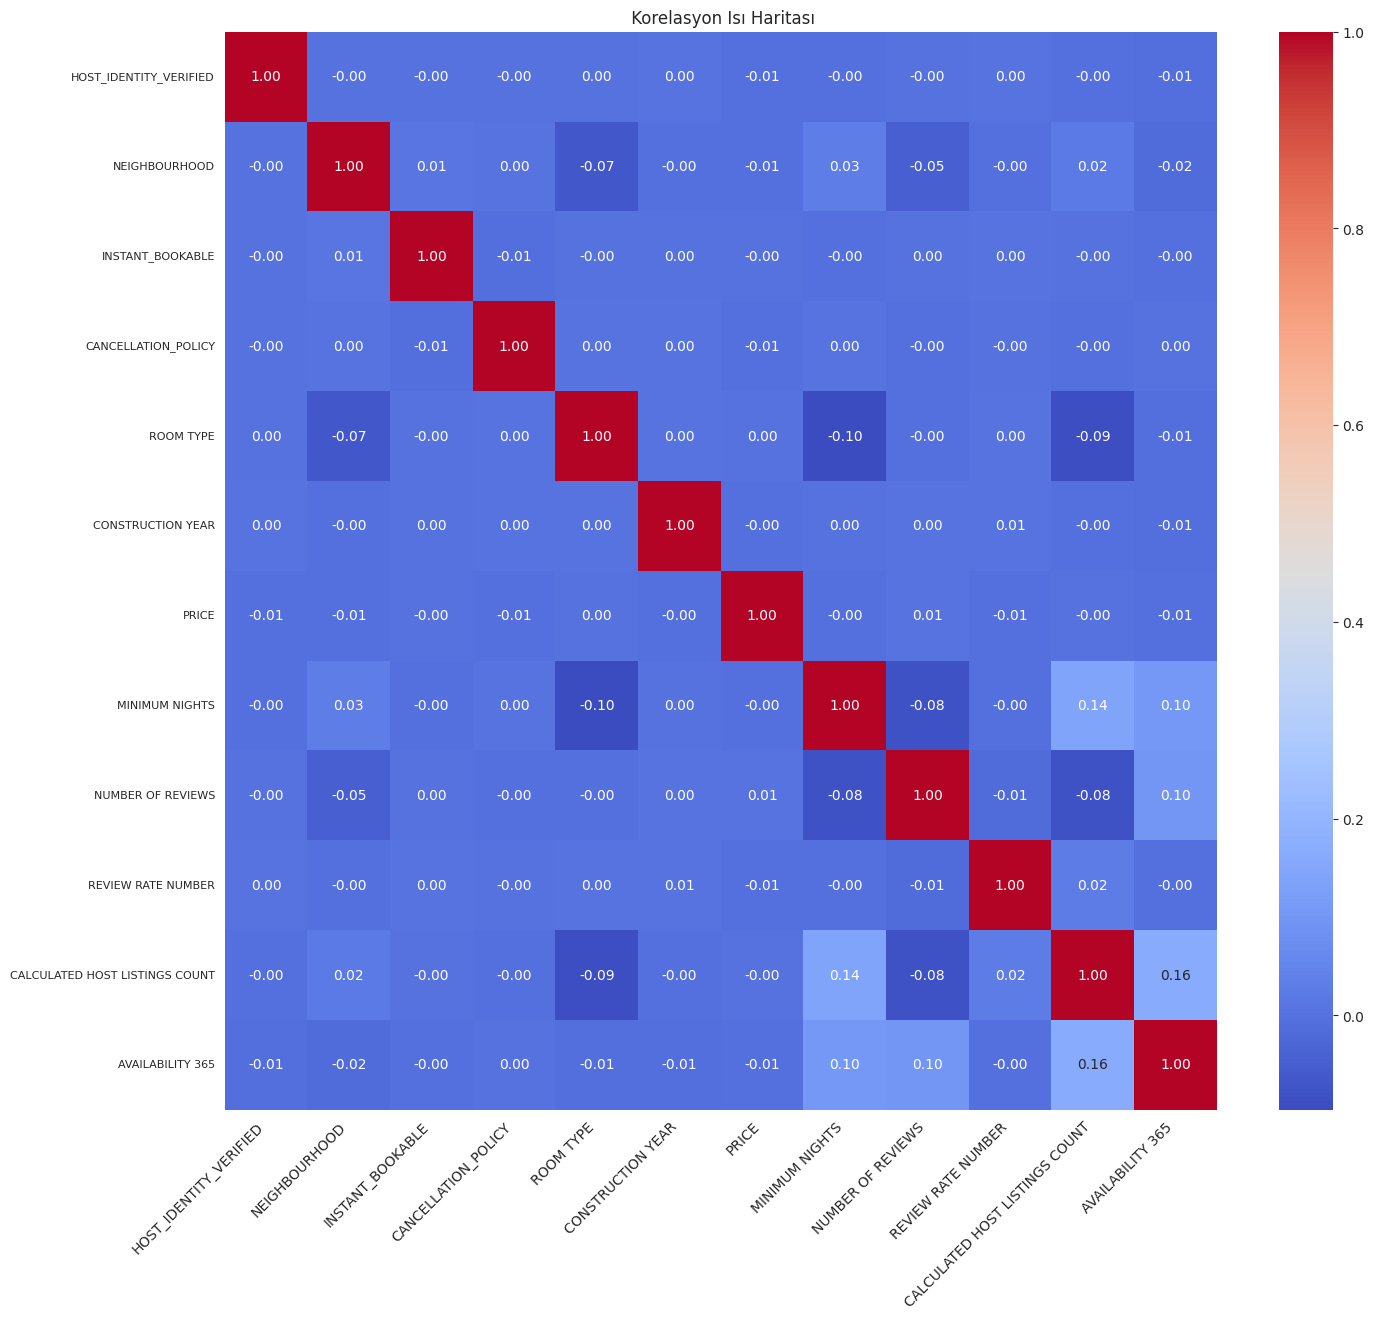

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunları seç
numeric_cols = [
       'HOST_IDENTITY_VERIFIED', 'NEIGHBOURHOOD',
       'INSTANT_BOOKABLE', 'CANCELLATION_POLICY', 'ROOM TYPE',
       'CONSTRUCTION YEAR', 'PRICE', 'MINIMUM NIGHTS',
       'NUMBER OF REVIEWS', 'REVIEW RATE NUMBER',
       'CALCULATED HOST LISTINGS COUNT', 'AVAILABILITY 365'
      ]

# Korelasyon matrisi
correlation = df[numeric_cols].corr()

# Isı haritası çizimi
plt.figure(figsize=(16, 14))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title(' Korelasyon Isı Haritası')
# X ve Y ekseni yazılarını küçült
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=8)

plt.show()

Bir önceki ısı haritasından daha farklı olarak söylenebilecek ilişkilerin yorumlarını yapmaya çalıştım.

*  **NEIGHBOURHOOD - CALCULATED HOST LISTINGS COUNT: 0.02** Bazı mahallelerde daha fazla ilana sahip ev sahipleri olabilir.
* **REVIEW RATE NUMBER - CALCULATED HOST LISTINGS COUNT: 0.02** Profesyonel ev sahipleri biraz daha yüksek puan alıyor olabilir.
*  **NEIGHBOURHOOD - MINIMUM NIGHTS: 0.03** Bazı mahallelerde minimum konaklama süresi hafifçe artabiliyor.
* **NEIGHBOURHOOD - AVAILABILITY 365: -0.02** Belirli mahallelerdeki ilanlar yıl boyunca daha az aktif olabilir.

* **NEIGHBOURHOOD - NUMBER OF REVIEWS: -0.05** elirli mahallelerdeki ilanlar daha az yorum alma eğiliminde.

* **NEIGHBOURHOOD - ROOM TYPE: -0.07** Bazı mahallelerde belirli oda tipleri daha yaygın ya da nadir olabilir.

* **MINIMUM NIGHTS - NUMBER OF REVIEWS: -0.08** Uzun konaklama şartı olan ilanlar daha az yorum alır.

* **ROOM TYPE - CALCULATED HOST LISTINGS COUNT: -0.09** Profesyonel ev sahipleri genellikle tüm evi kiralamayı tercih eder.

* **ROOM TYPE - MINIMUM NIGHTS: -0.10** Paylaşımlı veya özel odalar genellikle kısa konaklamalar için tercih edilir.

# GÖZETİMLİ ÖĞRENME

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# 1. Gereksiz sütunları çıkar
drop_cols = ['ID', 'HOST ID', 'HOST NAME','NEIGHBOURHOOD GROUP', 'LAT', 'LONG', 'SERVICE FEE', 'COUNTRY','availability_group', 'REVIEW_BIN', 'price_level', 'color', 'BUILDING_AGE']

# 2. Feature ve target'ı belirle
X = df.drop(columns=drop_cols + ['PRICE'])  # PRICE hedef değişken olduğu için çıkarılıyor
y = df['PRICE']

X = pd.get_dummies(X, drop_first=True)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Model oluştur ve eğit
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. Tahmin yap
y_pred = model.predict(X_test)

# 6. Metriklerin hesaplanması
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# 7. Sonuçlar
print("🔍 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

🔍 Model Performance:
R² Score: 0.2353
MAE: 241.22
MSE: 85069.49
RMSE: 291.67
MAPE: 84.99%


In [69]:
from xgboost import XGBRegressor

# Gereksiz sütunları çıkar
drop_cols = ['ID', 'HOST ID', 'HOST NAME', 'NEIGHBOURHOOD GROUP', 'LAT', 'LONG',
             'COUNTRY', 'SERVICE FEE', 'availability_group', 'REVIEW_BIN', 'price_level', 'color', 'BUILDING_AGE']

X = df.drop(columns=drop_cols + ['PRICE'])
y = df['PRICE']

# Kategorik veriyi dönüştür
X = pd.get_dummies(X, drop_first=True)

# Eğitim ve test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100


print("🔍 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


🔍 Model Performance:
R² Score: 0.0284
MAE: 282.34
MSE: 108089.78
RMSE: 328.77
MAPE: 99.54%


In [70]:
from sklearn.ensemble import HistGradientBoostingRegressor

X = df.drop(columns=drop_cols + ['PRICE'])
y = df['PRICE']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100


print("🔍 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


🔍 Model Performance:
R² Score: 0.0149
MAE: 286.51
MSE: 109597.39
RMSE: 331.05
MAPE: 101.62%


Yukarıda Random Forest Reggressor, XGB Regressor ve Hist Gradient Boosting Regressor modellerini denedim, verisetimi deneme gruplarına ayırıp. Doğruluk oranımın en iyi olduğu model Random Forest Reggressor ile devam ettim. Burada oranım çok yüksek gibi durmasa da hiperparametre kısmında doğruluk oranı çok arttı.

# GÖZETİMSİZ ÖĞRENME

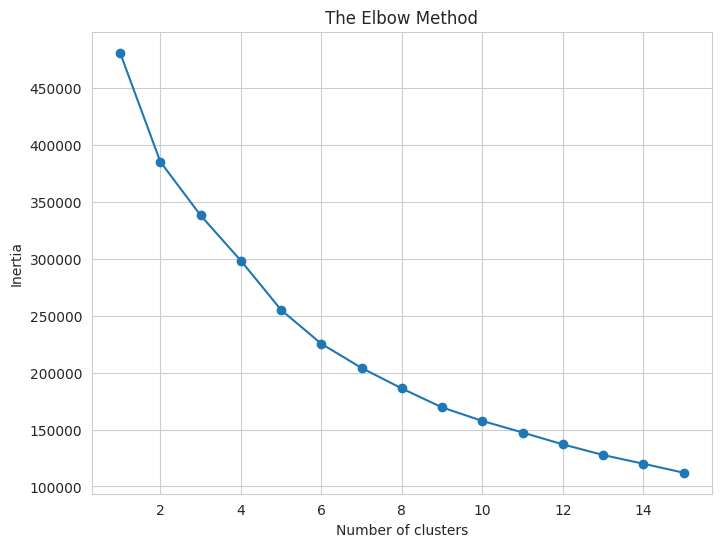

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Clustering için kullanılacak değişkenler
features = ['NEIGHBOURHOOD', 'ROOM TYPE', 'BUILDING_AGE', 'MINIMUM NIGHTS', 'AVAILABILITY 365']
X = df[features].copy()

# 2. Veriyi ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Elbow yöntemi ile uygun küme sayısını bul
inertias = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Grafikle göster
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 16), inertias, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



* Grafikte görüldüğü üzere tam bir elbow oluşumu gözlemlenememektedir. Bu yüzden yaklaşık olarak 6 cluster olmasını seçtim. Çünkü 6'dan sonrakilerde inertia çok büyük bir azalma göstermiyor. (14 seçilebilir görülse de bu sefer her küçük bölge için ayrı küme olmasını istemedim.)

In [72]:
model = KMeans(n_clusters=6)
training_points = X_scaled[:1000]
test_points = X_scaled[1000:]
model.fit(training_points)
labels = model.predict(test_points)

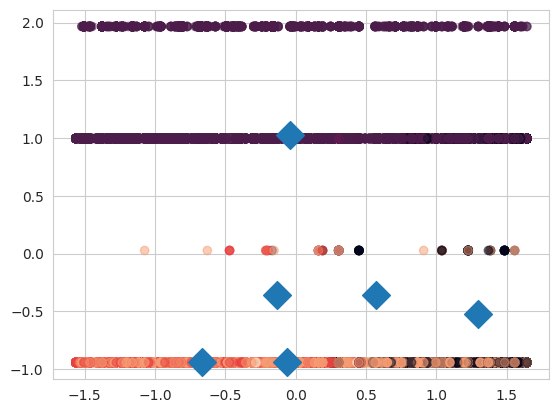

In [73]:
xs = test_points[:, 0]
ys = test_points[:, 1]

# Küme renklerini tanımlamak için etiketleri kullan
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Küme merkezlerini (centroid'leri) atamak
centroids = model.cluster_centers_

# Centroid'lerin sütunlarını atamak: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Centroid'lerin saçılım grafiğini oluşturmak
plt.scatter(centroids_x, centroids_y, marker='D', s=200)

plt.show()

* Grafikte görüldüğü üzere ilk halinde kümeler çok belirli gözükmediğinden alttaki PCA metodunu denemek ve algoritmamı ve çıktımı iyileştirmeye çalıştım.

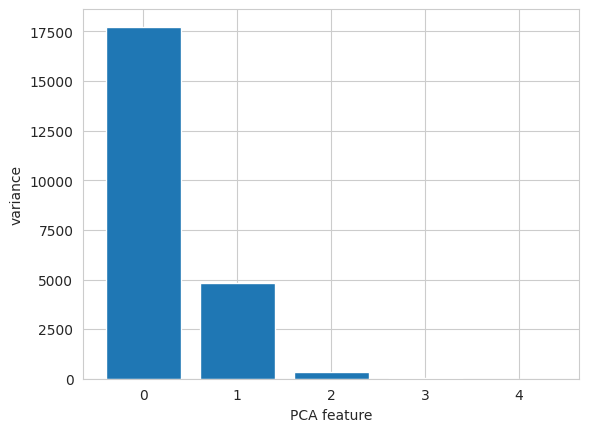

In [74]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

* PCA feature 2 seçildiği takdirde en iyisi olacağından n_components=2 ile devam ettim.

In [75]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca_features = pca.transform(X_scaled)

In [76]:
# Loading'leri DataFrame'e çevir
loading_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)

# İlk 2 bileşenin yüklerini hızlıca görelim
print(loading_df[['PC1', 'PC2']].round(3))


    PC1   PC2
0  0.30  0.65
1 -0.54 -0.38
2  0.03 -0.04
3  0.66 -0.20
4  0.42 -0.63


In [77]:
df['ROOM TYPE'].unique()

array([2, 0, 3, 1])

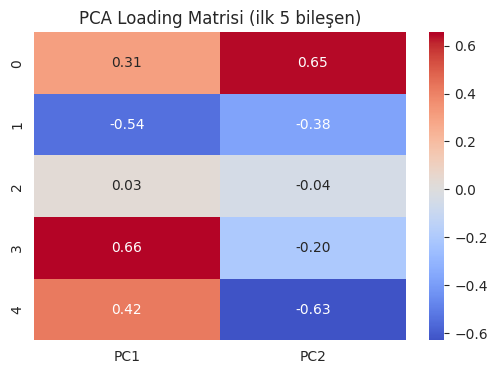

In [78]:
plt.figure(figsize=(6, 4))
sns.heatmap(loading_df.iloc[:, :5],   # ilk 5 bileşen
            cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('PCA Loading Matrisi (ilk 5 bileşen)')
plt.show()
features = ['NEIGHBOURHOOD', 'ROOM TYPE', 'BUILDING_AGE', 'MINIMUM NIGHTS', 'AVAILABILITY 365']


* Grafikte kullandığım özelliklerden hangileri hangi PCA componentine ne kadar etki ediyor gösteriliyor.

* PC1'de Room Type ve Minimum Nights etkileri yüksektir. Yani PC1 için uzun konaklama ve ters oda tipi (room tipi değiştikçe entire home'dan otele gittikçe kiralama uzunluğu azalıyor) özelliğini açıklamaktadır diyebiliriz.

* PC2'de ise Neighboorhood ve Availability 365 etkileri yüksektir. Yani PC2 için mahalle ve uygunsuzluğu açıklıyor diyebiliriz. Yani mahalle Brooklyn'den Staten Island'a giderken bütün yıl uygun olan ilan bulma olasılığımız azalıyor. Bunun etkisi de Staten Island'da Brooklyn'e göre daha az ilan olmasındandır.


In [79]:
def top_loadings(comp, n=3):
    """Belirli bileşende en yüksek mutlak yüklere sahip değişkenleri getir."""
    return (loading_df[comp]
            .abs()
            .sort_values(ascending=False)
            .head(n))

for comp in ['PC1', 'PC2']:
    print(f'\n{comp} için en baskın değişkenler:')
    print(top_loadings(comp, n=3))



PC1 için en baskın değişkenler:
3   0.66
1   0.54
4   0.42
Name: PC1, dtype: float64

PC2 için en baskın değişkenler:
0   0.65
4   0.63
1   0.38
Name: PC2, dtype: float64


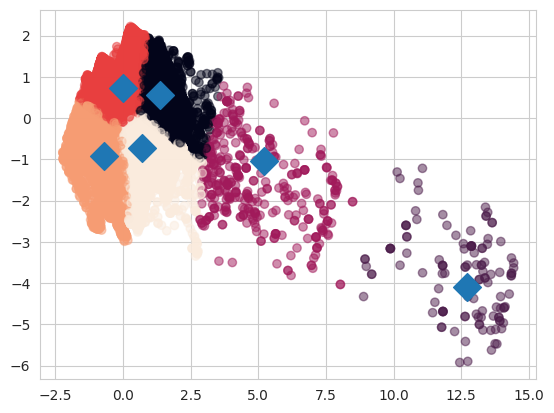

In [80]:
model = KMeans(n_clusters=6, random_state=42)
training_points = pca_features[:1000]
test_points = pca_features[1000:]
model.fit(training_points)
labels = model.predict(test_points)


all_labels = model.predict(pca_features)

df['PCA_CLUSTER_6'] = all_labels

xs = test_points[:, 0]
ys = test_points[:, 1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, marker='D', s=200)

plt.show()

* PCA metodundan sonra kümeler grafiğim ve noktalarım daha belirgin ve düzgün gözükmektedir.

* Sol tarafta 4 kümenin birbirine yakın olmasını kısa süreli kalınan farklı mahallelerdeki farklı oda tipleri olarak yorumlayabiliriz.

* Sağa doğru gidildikçe hem kalma süresi artan hem de otel odasından tüm ev olan ilanlara geçiyor. Bu sayede farklı tipteki kalma yerlerini ve kalma uzunluklarına göre kümeleyebiliriz.

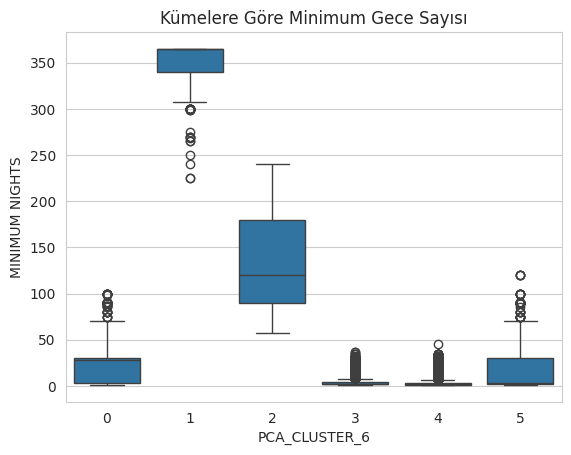

In [81]:
sns.boxplot(x='PCA_CLUSTER_6', y='MINIMUM NIGHTS', data=df)
plt.title("Kümelere Göre Minimum Gece Sayısı")
plt.show()

* Kümeler arasındaki farklar net bir şekilde görülüyor. Burada da farklı minimum kalma gecesine göre ilan sahibi profillerini çıkartabiliriz. Buna göre temizlik, stoklama gibi alanlarda farklı stratejiler geliştirilebilir.

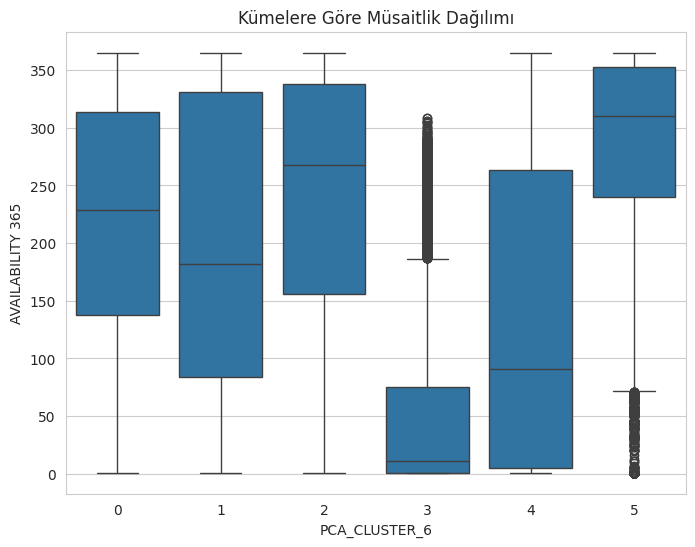

In [82]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='PCA_CLUSTER_6', y='AVAILABILITY 365', data=df)
plt.title("Kümelere Göre Müsaitlik Dağılımı")
plt.show()

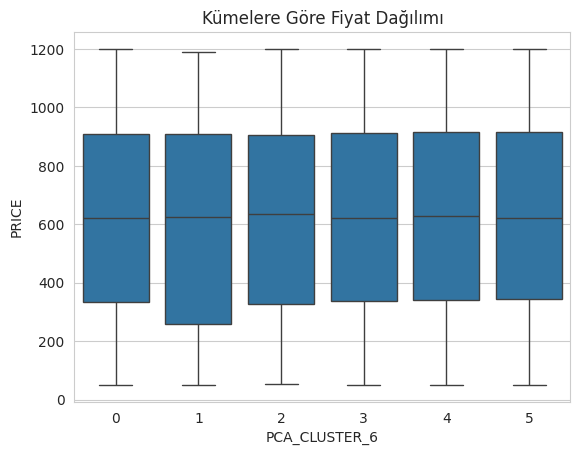

In [83]:
sns.boxplot(x='PCA_CLUSTER_6', y='PRICE', data=df)
plt.title("Kümelere Göre Fiyat Dağılımı")
plt.show()

* Genel olarak bakıldığında daha önce EDA kısmında da gördüğümüz kısımla karşılaşıyoruz. Fiyatları hem medyan olarak hem de genel olarak birbirine çok yakın veya çok önemsenmeyecek farklılıklar bulunmaktadır.

In [84]:
# Gerekli kütüphanelerin yüklenmesi
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Örnek veri seti oluşturma
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'inin tanımlanması
param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'max_depth': [None, 5, 10, 20],    # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],   # Bölünme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],     # Yaprak düğümlerindeki minimum örnek sayısı
    'max_features': ['log2', 'sqrt', 0.5],  # Her bölünmede kullanılacak özellik sayısı
    'bootstrap': [True, False]         # Bootstrap örnekleme kullanılıp kullanılmayacağı
}

# Random Forest modeli oluşturma
rf = RandomForestRegressor(random_state=42)

# GridSearchCV nesnesini oluşturma
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Negatif MSE kullanılıyor
    cv=5,                # 5 katlı çapraz doğrulama
    n_jobs=-1,           # Tüm CPU çekirdeklerini kullan
    verbose=2            # İşlem detaylarını göster
)

# GridSearchCV'yi eğitme
print("GridSearchCV eğitimi başlıyor...")
grid_search.fit(X_train, y_train)
print("GridSearchCV eğitimi tamamlandı!")

# Sonuçları görüntüleme
print("\nEn iyi parametreler: ", grid_search.best_params_)
print(f"En iyi skor (negatif MSE): {grid_search.best_score_:.4f}")

# En iyi modeli alma
best_rf = grid_search.best_estimator_

# Test seti üzerinde değerlendirme
y_pred = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print("\nTest seti performansı:")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")


GridSearchCV eğitimi başlıyor...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
GridSearchCV eğitimi tamamlandı!

En iyi parametreler:  {'bootstrap': True, 'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
En iyi skor (negatif MSE): -8406.1534

Test seti performansı:
Test MSE: 7015.2295
Test RMSE: 83.7570
Test R^2: 0.8188
